In [1]:
import sys
import os
from datetime import datetime
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso



In [2]:
sys.path.append(os.path.abspath('../src'))
from lib import (
    #get_train_test_split,
    #get_trained_model,
    train_and_evaluate_models,
    create_eui_comparison_plots,
    evaluate_model_strategies,
    calculate_average_metrics,
    create_error_distribution_plots
)

In [3]:
output_path = "../data/03_processed/merged_df.csv"
merged_df = pd.read_csv(output_path)
merged_df = merged_df.rename(columns={'total_year': 'hdd_total_year'})

# GDP per capita
merged_df['GDP_per_capita'] = merged_df['GDP_2022'] / merged_df['Population_2023']

# Delete Taiwan (temporal)
merged_df = merged_df[merged_df['Country'] != 'Taiwan']

#np.random.seed(123)
#merged_df['is_train'] = np.random.choice([1, 0], size=len(merged_df), p=[0.8, 0.2])

# Train / Test

In [4]:
train_test_split_original_data_path = "../data/03_processed/train_test_split_original_data.csv"
train_test_split_original_data = pd.read_csv(train_test_split_original_data_path)

train_test_split_new_data_path = "../data/03_processed/train_test_split_new_data.csv"
train_test_split_new_data = pd.read_csv(train_test_split_new_data_path)

train_test_split = pd.concat([train_test_split_original_data, train_test_split_new_data], ignore_index=True)

merged_df = merged_df.merge(train_test_split, on=['index', 'geonameid'], how='left')

# We want to keep original data 
merged_df = merged_df[merged_df["source"] == "World Bank CURB"]

# Delete Image Null

In [ ]:
print(merged_df.shape)

merged_df = merged_df.dropna(subset=['pca_result'])

print(merged_df.shape)

(481, 67)
(473, 67)


In [ ]:
features = [
    "hdd_total_year", 
    "cdd_total_year", 
    "GDP_per_capita", 
    "Urbanization_Rate_2022",
    "latitude",
    "longitude",  
    "Paris_Agreement",
    "Subnational HDI", 
    "Educational index", 
    "Income index",
    "2m_temperature_2023_avg",
    "2m_dewpoint_temperature_2023_avg",
    "total_precipitation_2023",
    # "longitude_sin", 
    # "longitude_cos", 
    # "latitude_sin", 
    # "latitude_cos",  
    "population_density",

    # Image data

    "pca_result", 
    # "K_mean_label", 
    # "C_mean_label", 
    # "GMM_label", 
    "Cluster_1",
    "Cluster_2", 
    "Cluster_3",
    "Cluster_4", 
    "Cluster_5",
    "Cluster_6", 
    "Cluster_7", 
    "Cluster_8", 
    "Cluster_9", 
    "Cluster_10",
    "Cluster_11", 
    "Cluster_12", 
    "Cluster_13", 
    "Cluster_14", 
    "Cluster_15",
    "Cluster_16", 
    "Cluster_17", 
    "Cluster_18", 
    "Cluster_19"
]

feature_abbreviations = {
    "hdd_total_year": "HDD",
    "cdd_total_year": "CDD", 
    "GDP_per_capita": "GDP",
    "Urbanization_Rate_2022": "URB",
    "latitude": "Lat",
    "longitude": "Long",
    "Paris_Agreement": "Paris",
    "Subnational HDI": "HDI", 
    "Educational index": "EDU", 
    "Income index": "Income",
    "2m_temperature_2023_avg": "Temp",
    "2m_dewpoint_temperature_2023_avg": "Dew",
    "total_precipitation_2023": "Precip",
    # "longitude_sin": "Long_Sin", 
    # "longitude_cos": "Long_Cos", 
    # "latitude_sin": "Lat_Sin", 
    # "latitude_cos": "Lat_Cos",  
    "population_density": "Pop_Dens",
    "pca_result": "PCA",
    "Cluster_1": "C1",
    "Cluster_2": "C2",
    "Cluster_3": "C3",
    "Cluster_4": "C4",
    "Cluster_5": "C5",
    "Cluster_6": "C6",
    "Cluster_7": "C7",
    "Cluster_8": "C8",
    "Cluster_9": "C9",
    "Cluster_10": "C10",
    "Cluster_11": "C11",
    "Cluster_12": "C12",
    "Cluster_13": "C13",
    "Cluster_14": "C14",
    "Cluster_15": "C15",
    "Cluster_16": "C16",
    "Cluster_17": "C17",
    "Cluster_18": "C18",
    "Cluster_19": "C19"
}


target_columns = [
    "Residential EUI (kWh/m2/year)",
    "Non-residential EUI (kWh/m2/year)"
]

regions = ['Asia & Oceania', 'Europe', 'Africa', 'Central and South America', 'Northern America']


# Linear Regression 

### Linear Regression - Within Domain

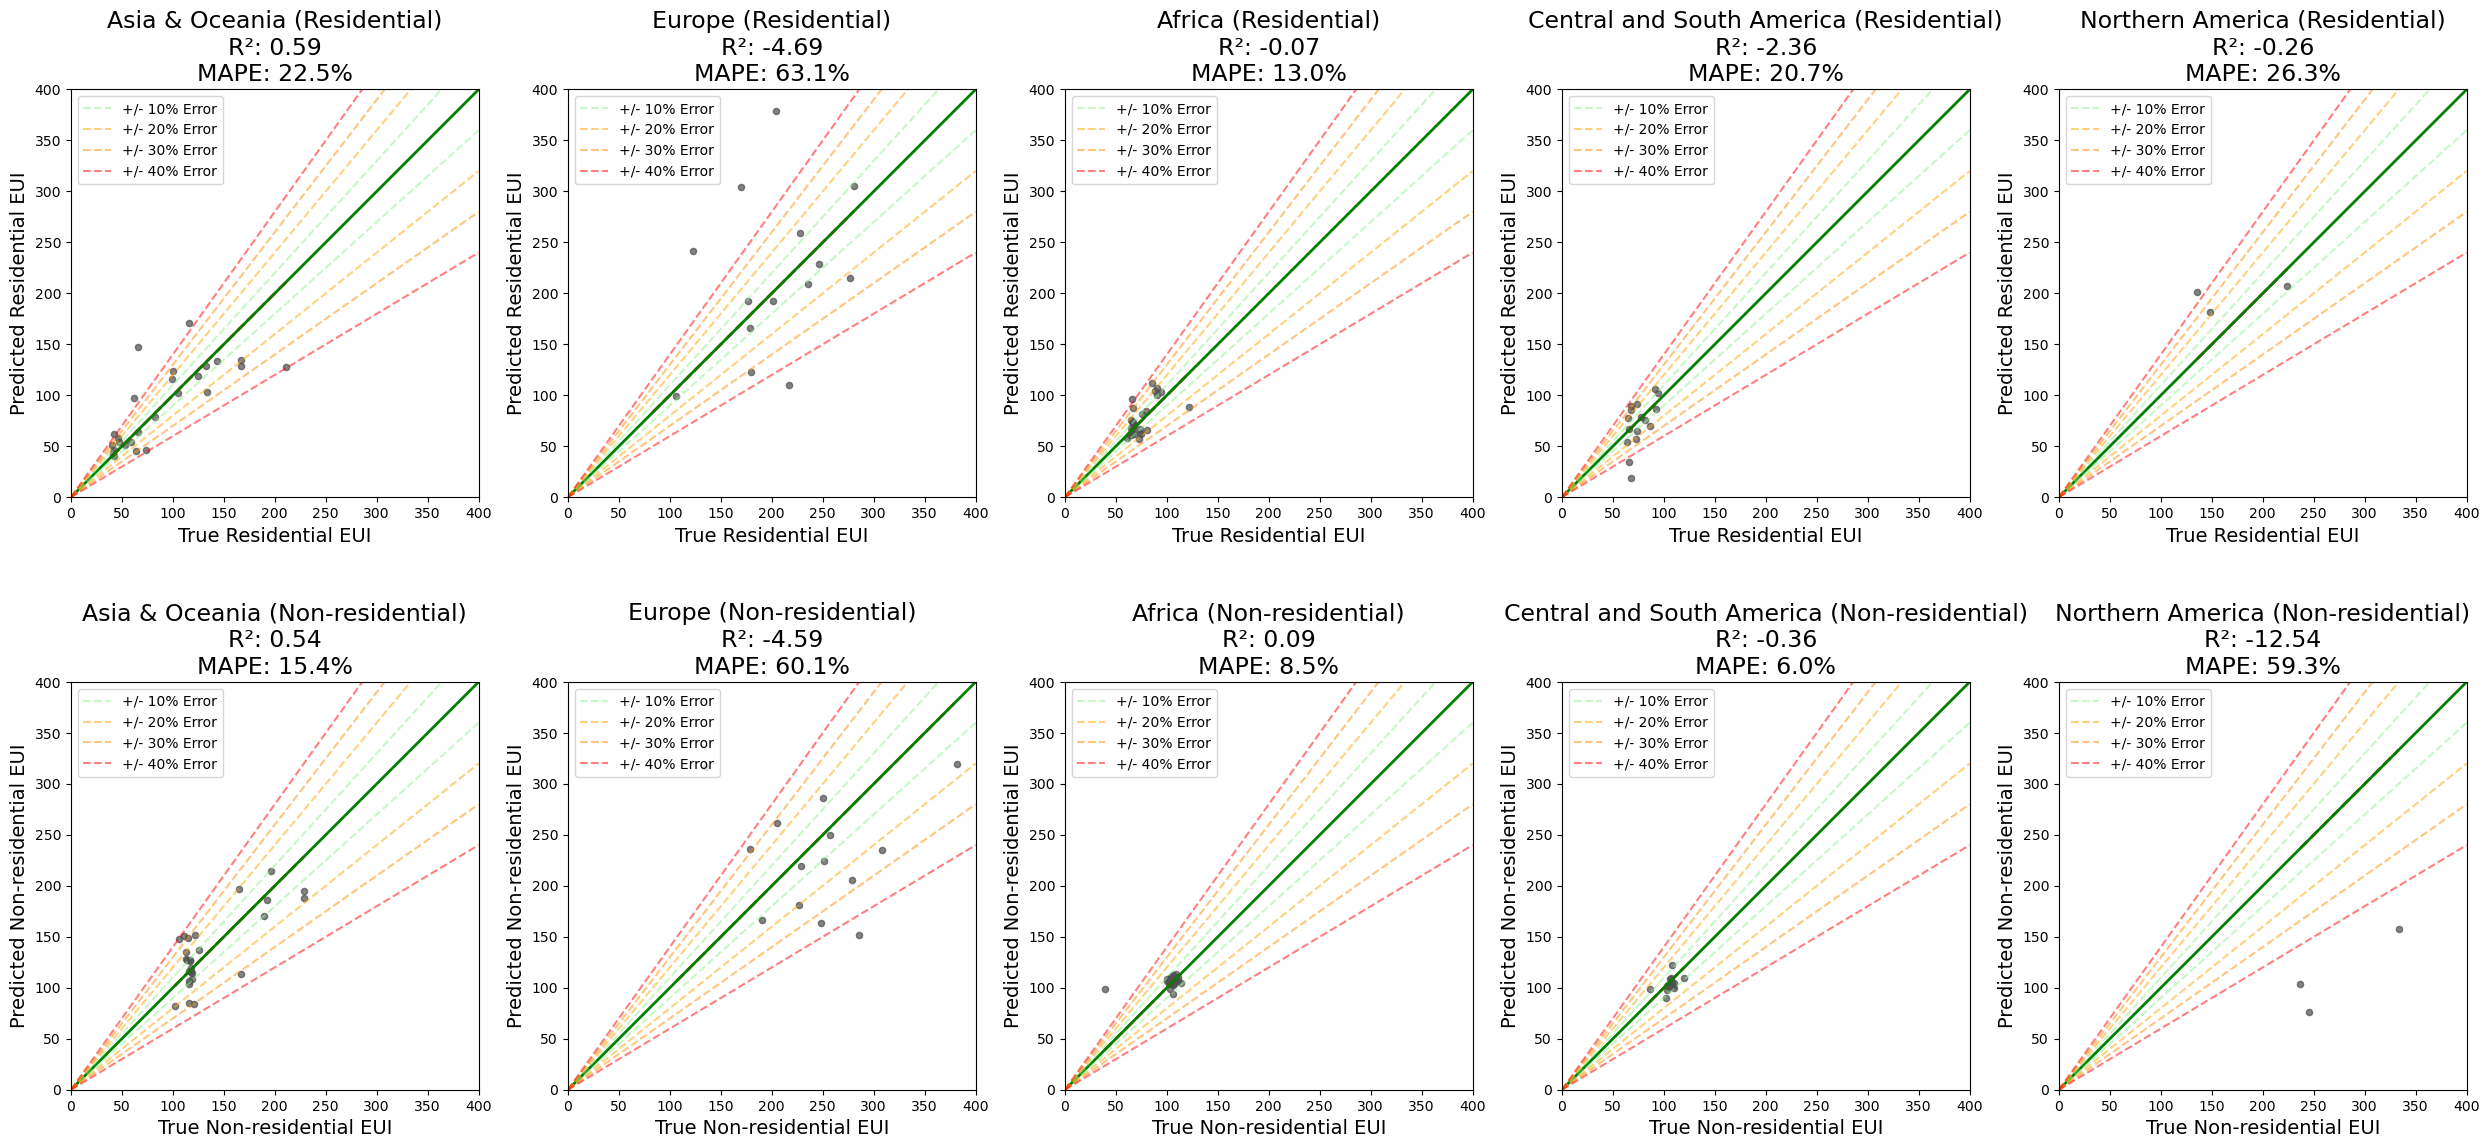

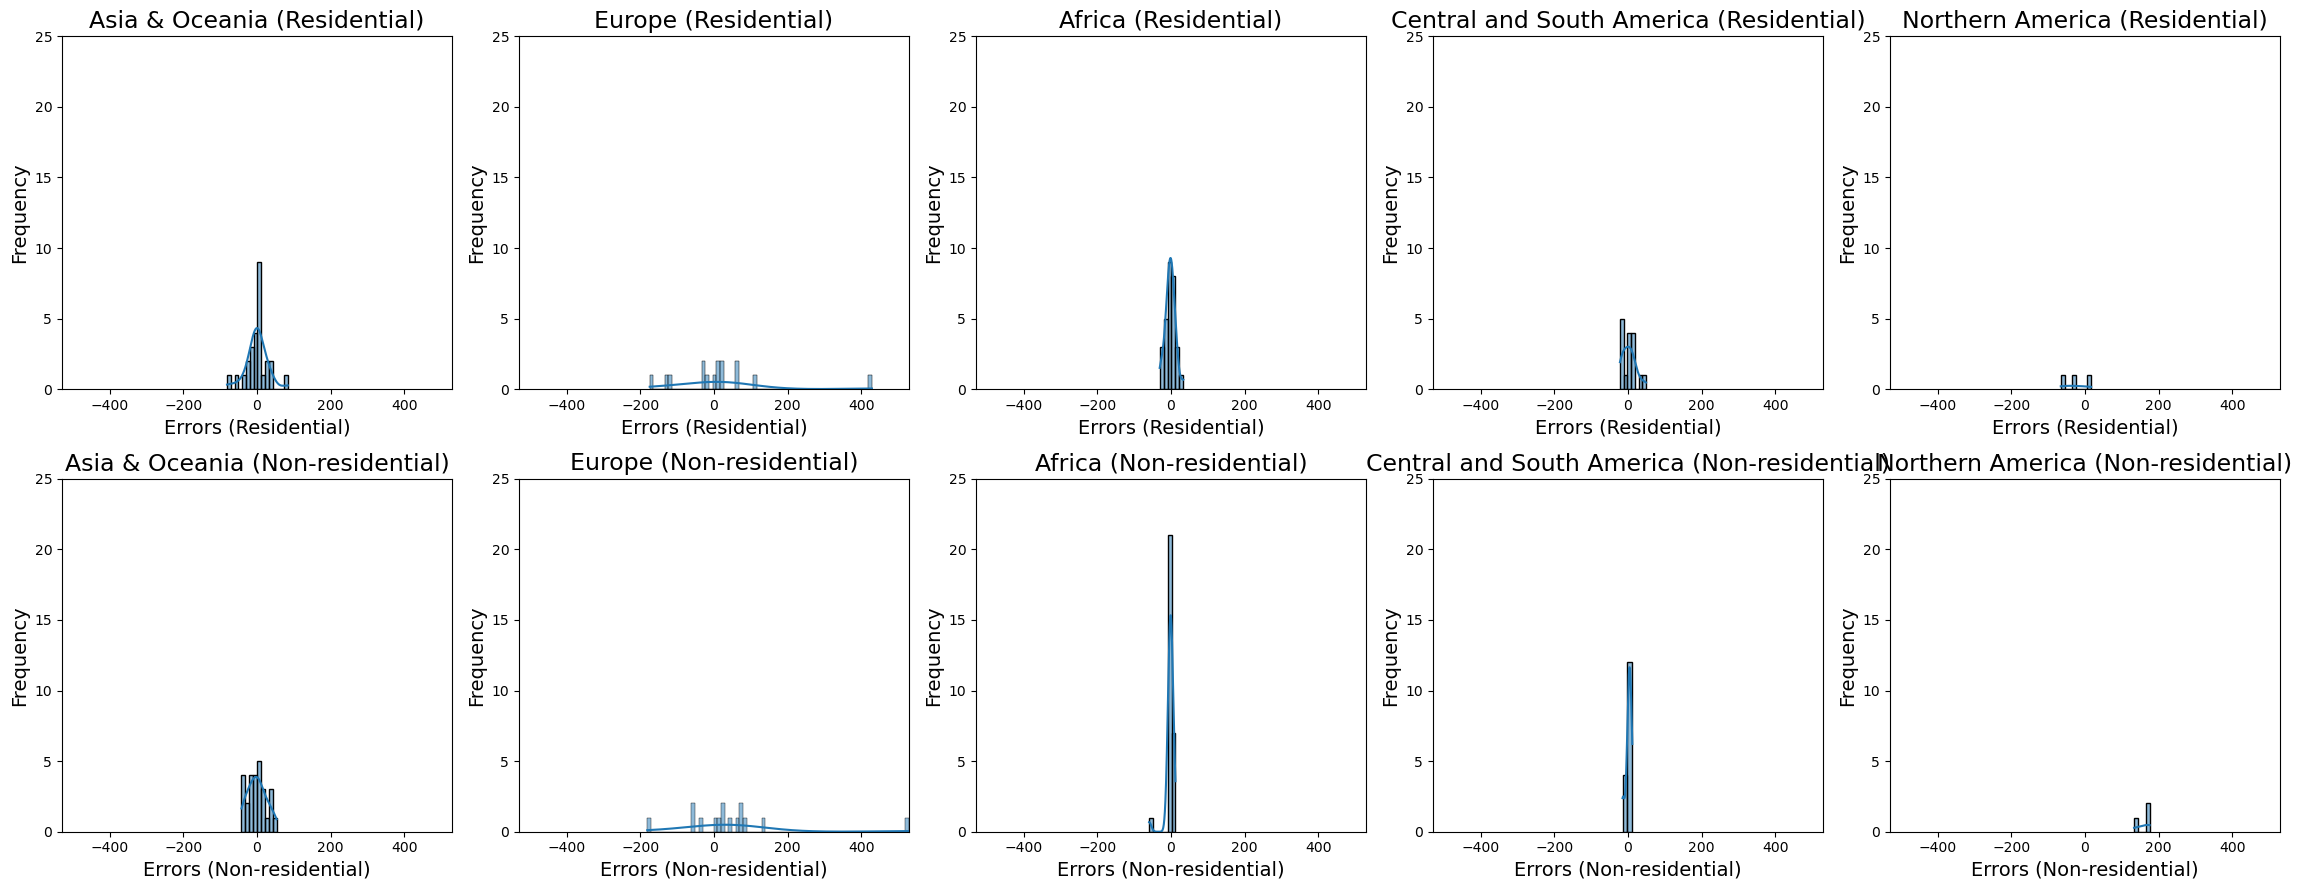

In [7]:
# Within-domain
model_lr_within = LinearRegression()
results_lr_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lr_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_lr_within, 
    save_path='../figures/model_plots/lr_within_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_within,
    save_path='../figures/model_plots/lr_within_domain_error_distribution.png')


### Linear Regression - Cross Domain

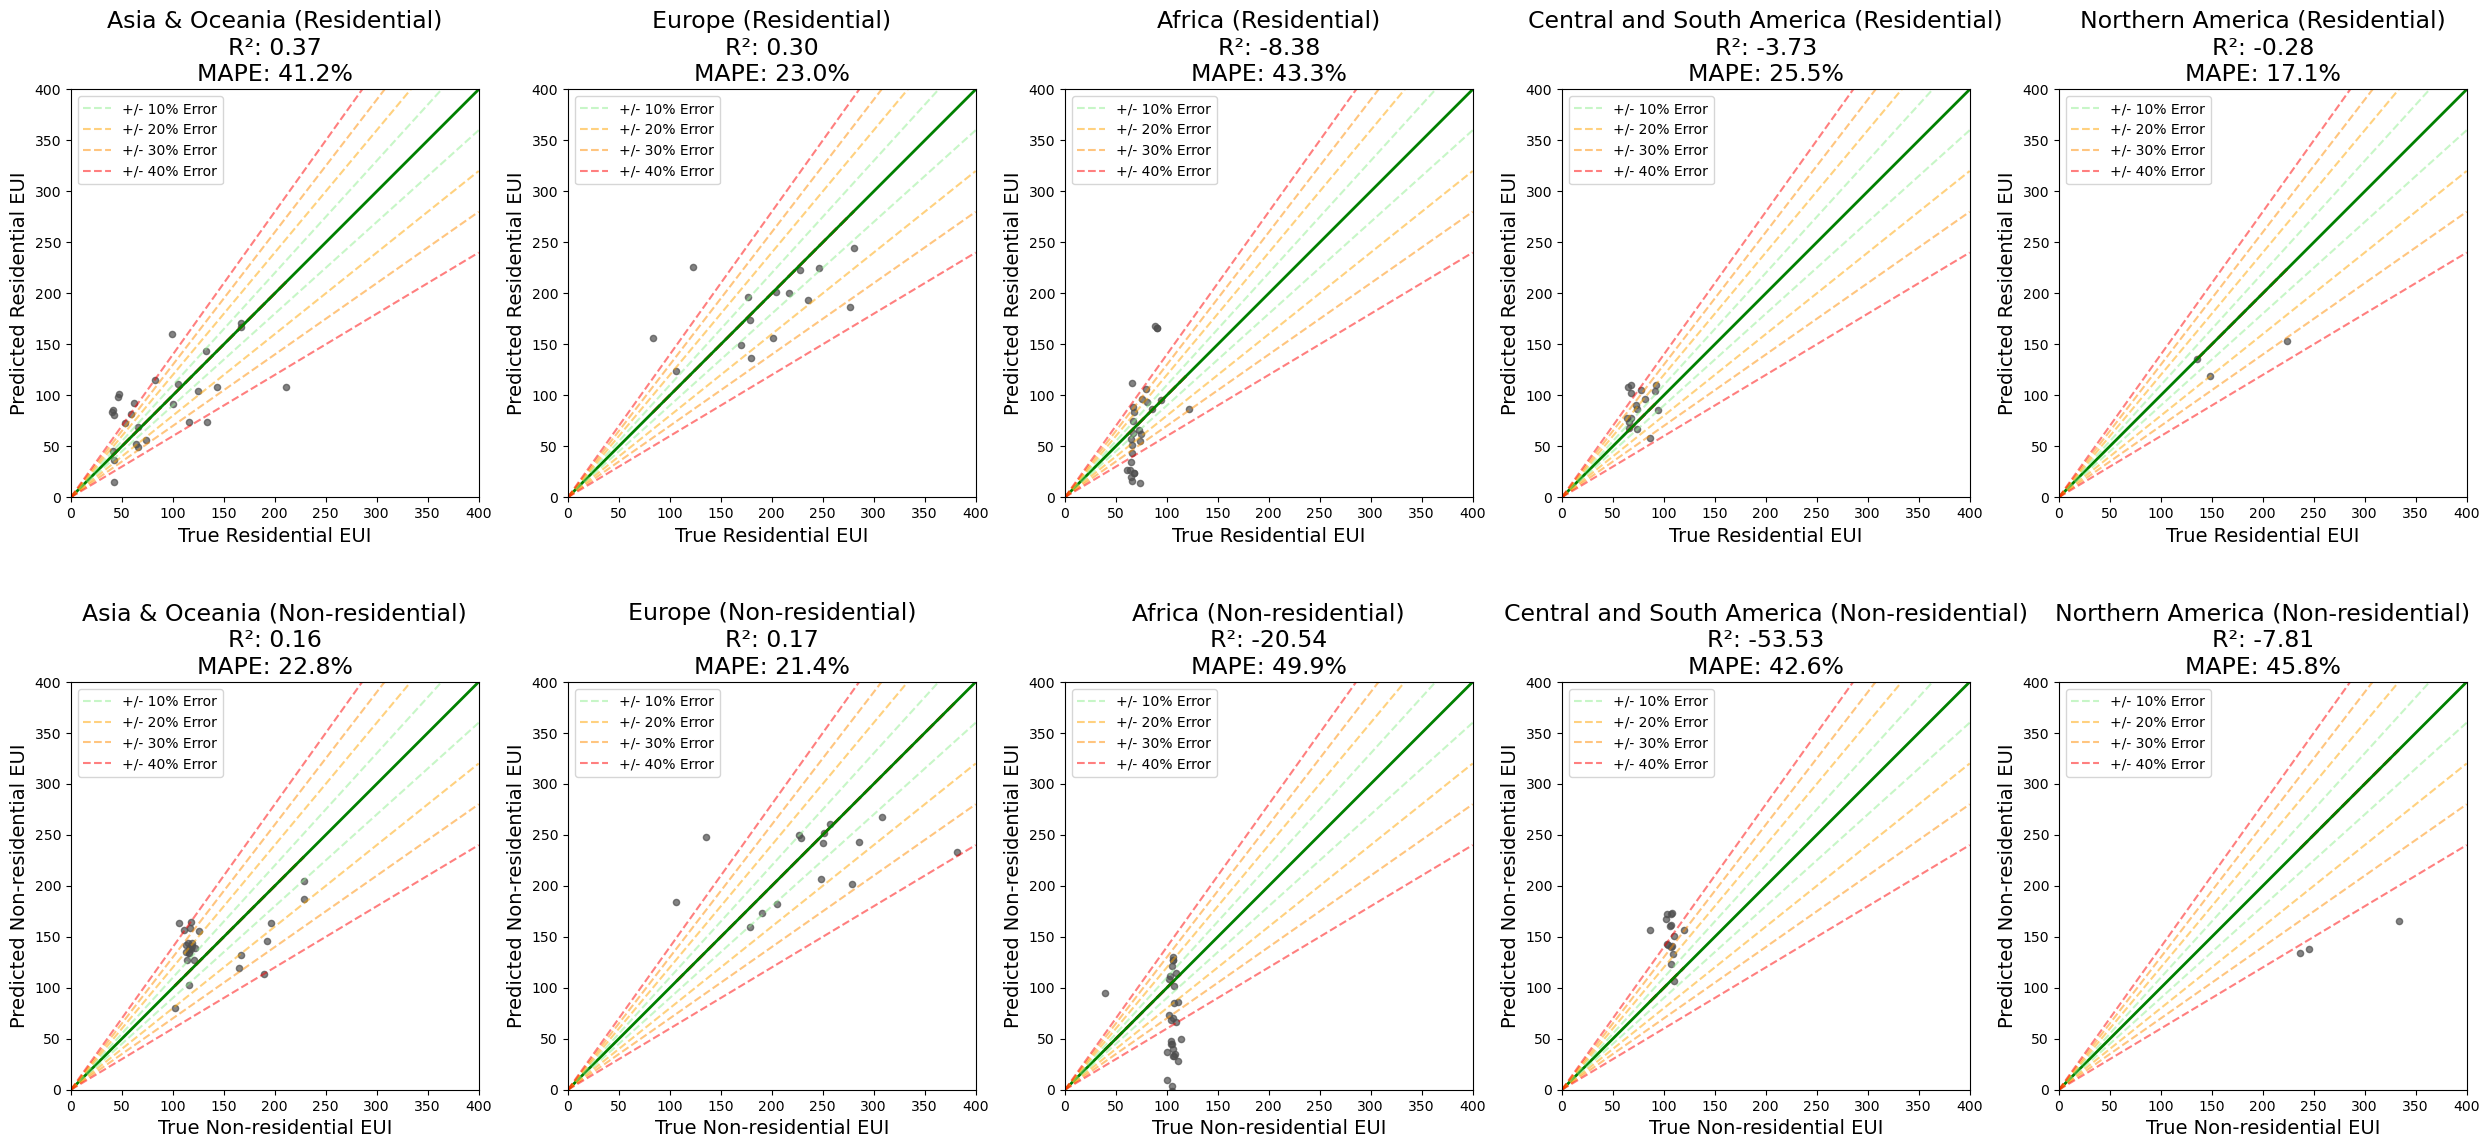

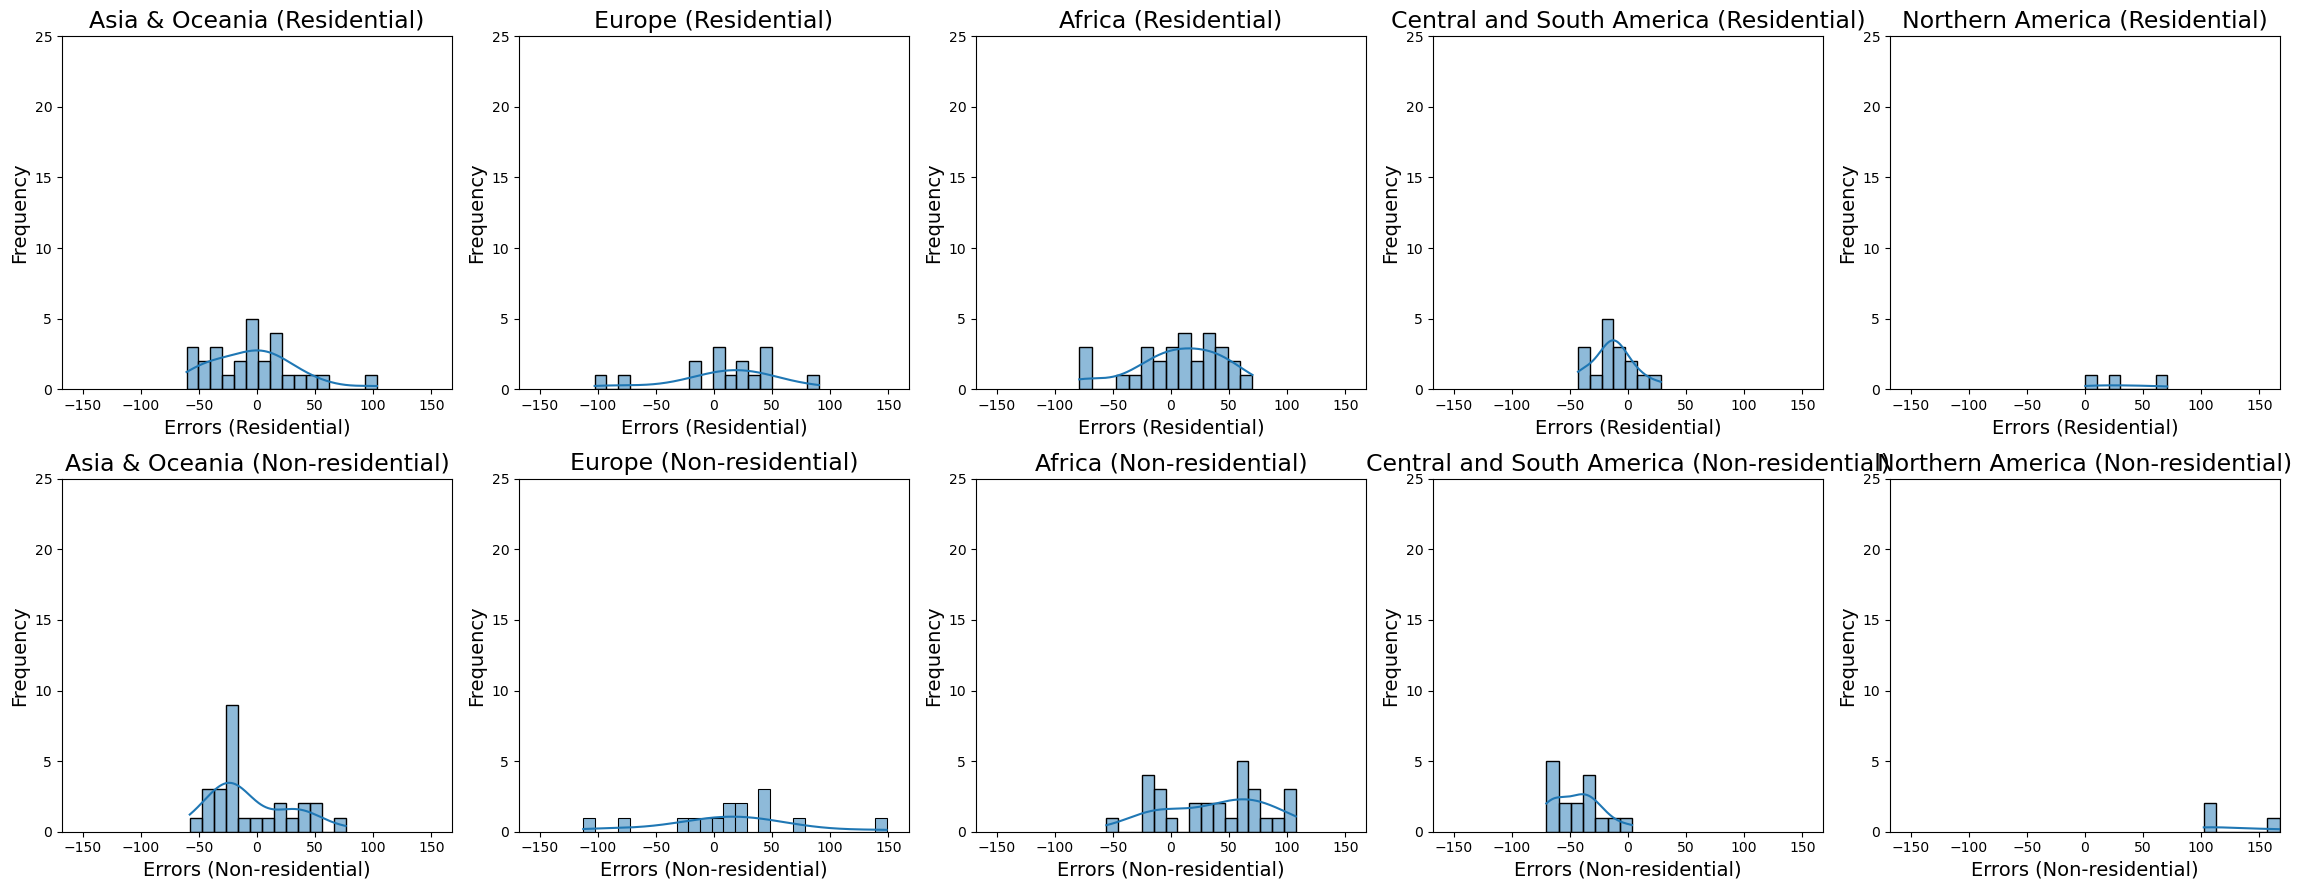

In [8]:
# Cross-domain 
model_lr_cross = LinearRegression()
results_lr_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lr_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_lr_cross,
    save_path='../figures/model_plots/lr_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_cross,
    save_path='../figures/model_plots/lr_cross_domain_error_distribution.png')

### Linear Regression - All Domain

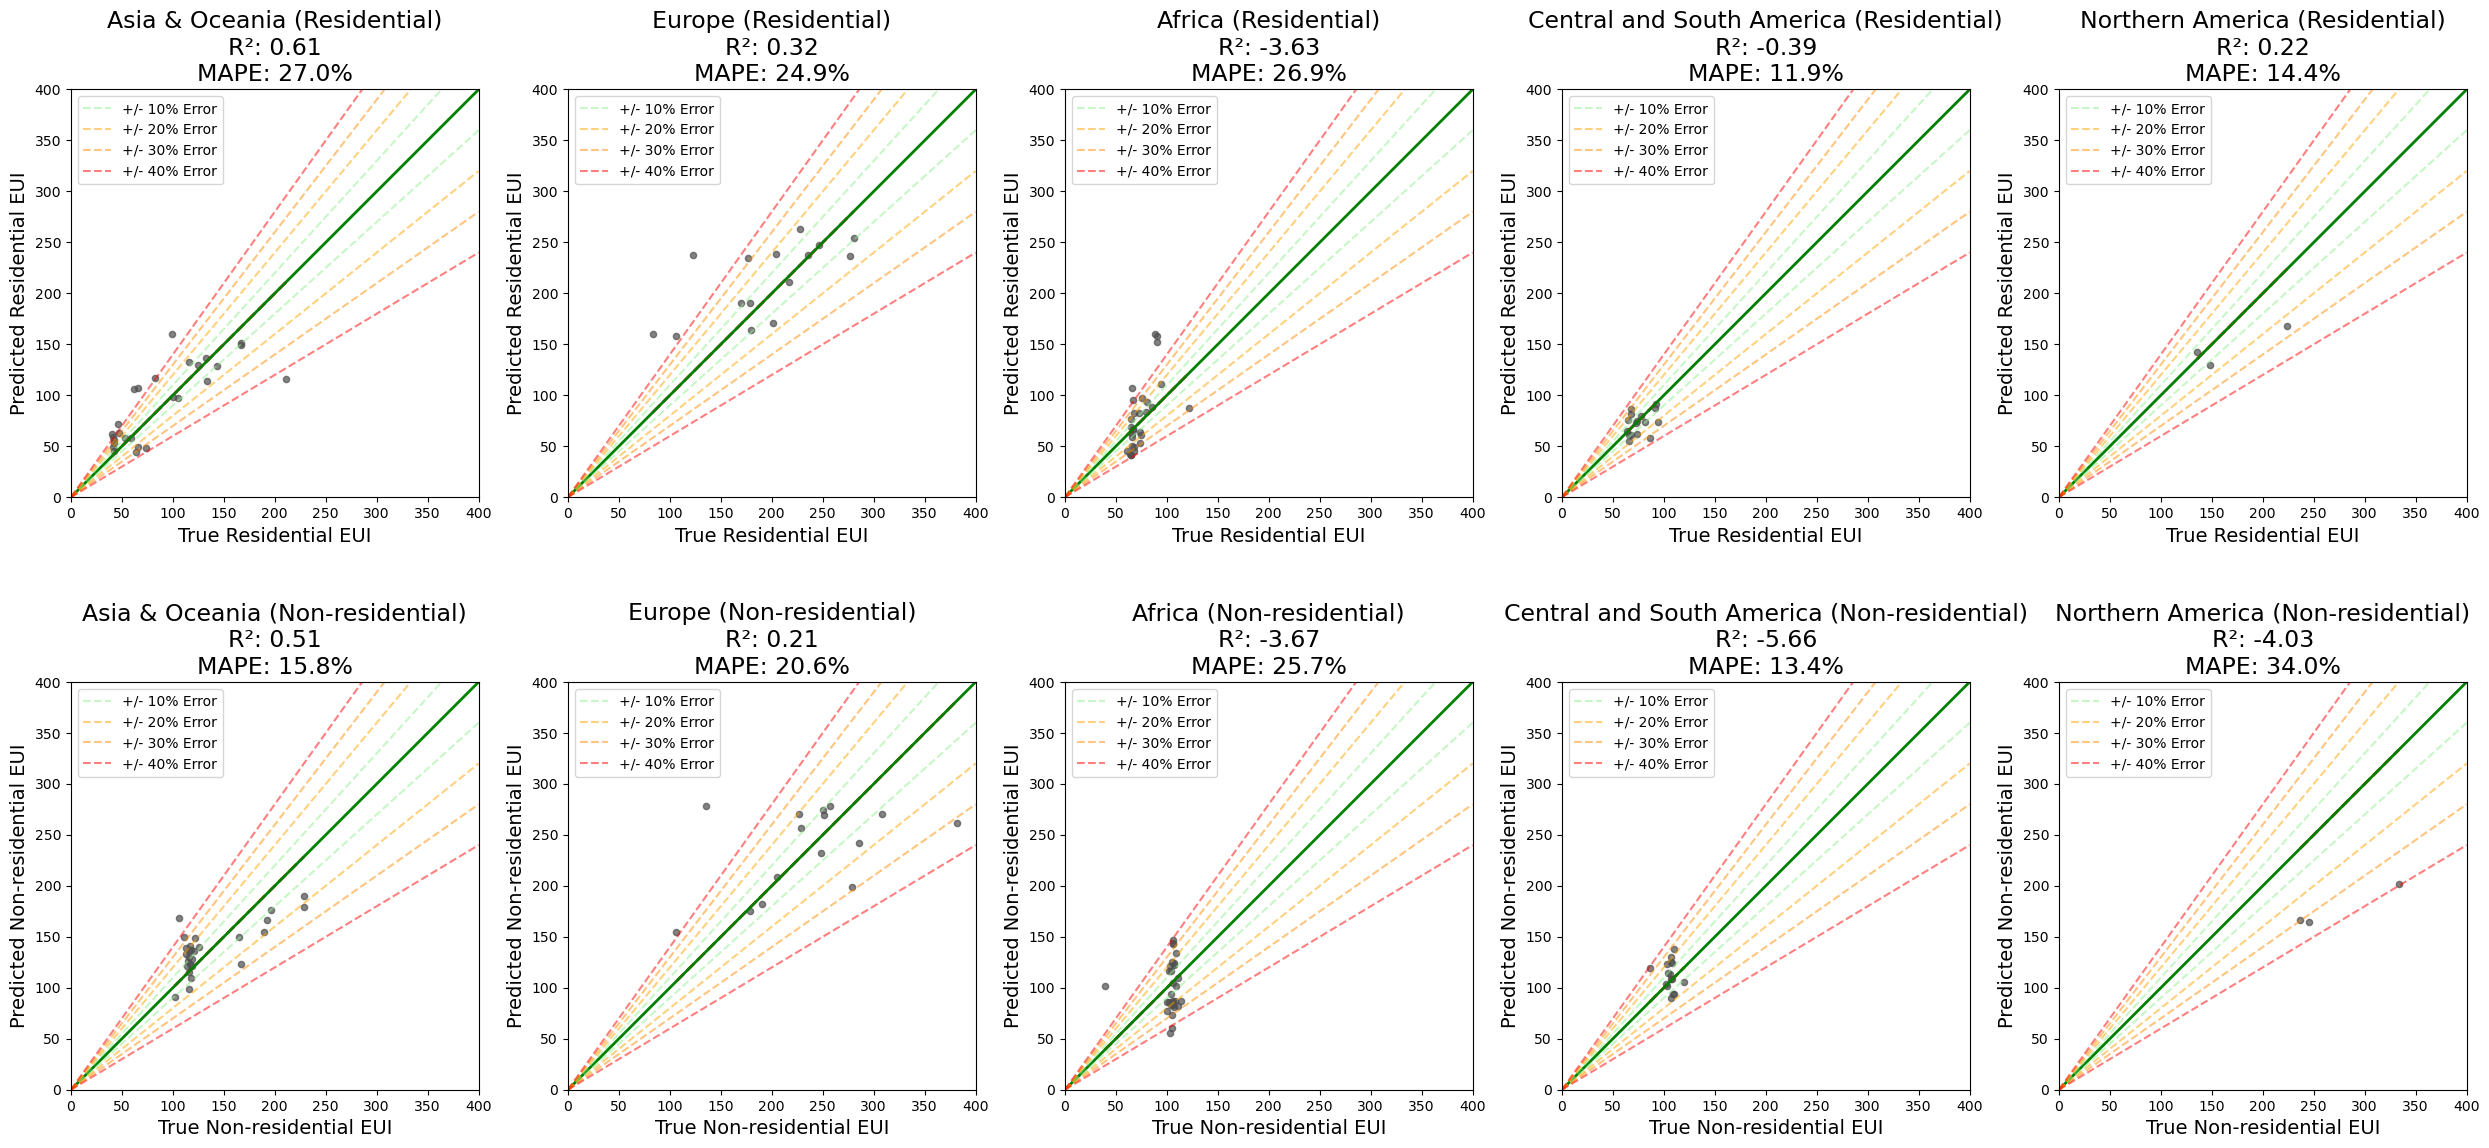

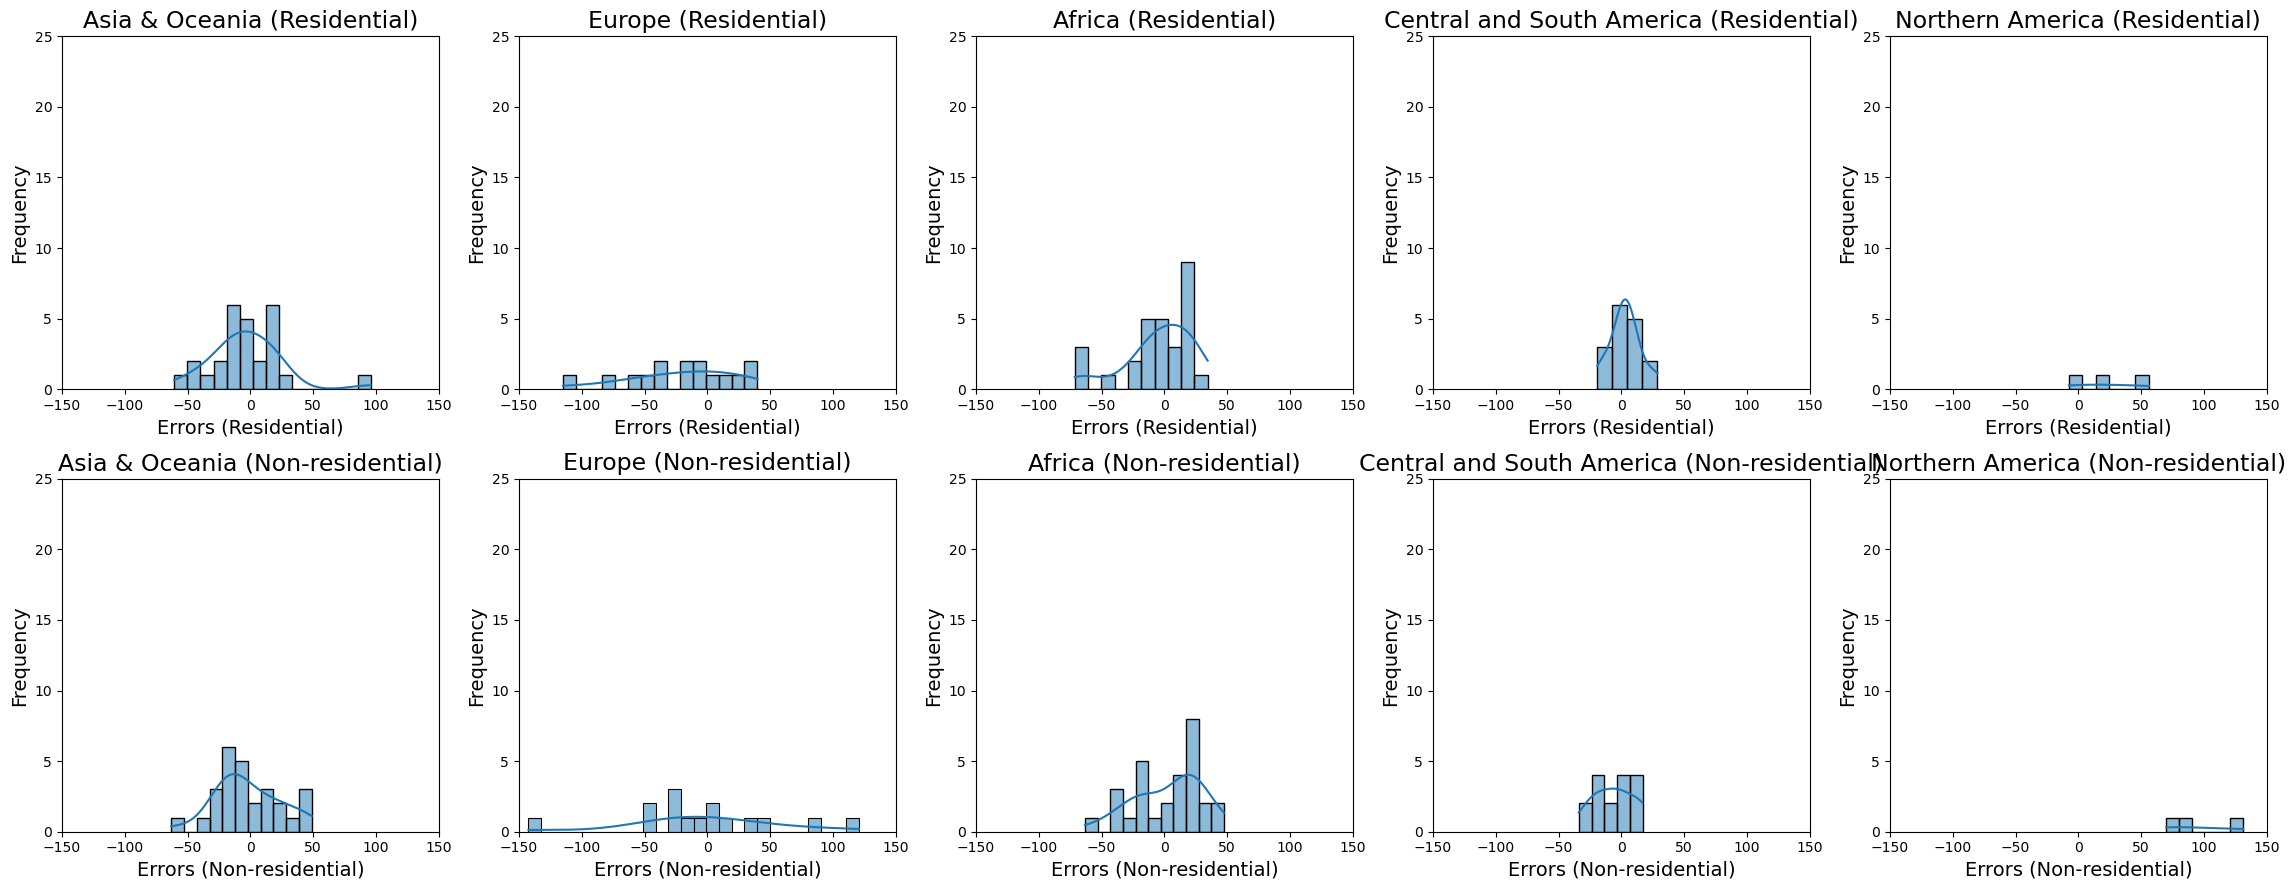

In [9]:
# All-domain
model_lr_all = LinearRegression()
results_lr_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lr_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_lr_all,
    save_path='../figures/model_plots/lr_all_domain_eui_predictions.png')

create_error_distribution_plots(results_lr_all,
    save_path='../figures/model_plots/lr_all_domain_error_distribution.png')

In [10]:
lr_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LinearRegression,
   feature_abbreviations=feature_abbreviations,
   model_details="No regularization"
)

lr_average_results = calculate_average_metrics(lr_detailed_results).reset_index()
lr_average_results

Target       Strategy             Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LinearRegression   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
2  Non-residential EUI (kWh/m2/year)     all_domain  LinearRegression   
3      Residential EUI (kWh/m2/year)  within_domain  LinearRegression   
4      Residential EUI (kWh/m2/year)   cross_domain  LinearRegression   
5      Residential EUI (kWh/m2/year)     all_domain  LinearRegression   

       Model Details                                      Features Used  \
0  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  No regularization  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²  \
0  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  29.86  -3.370   
1  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  36.50 -16.310   
2  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  21.90  -2.526   
3  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  29.12  -1.360   
4  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  30.02  -2.346   
5  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  21.02  -0.573   

         MSE    RMSE     MAE   WAPE  
0  10170.992  72.204  57.030  24.94  
1   5451.401  66.062  58.785  35.36  
2   2935.856  45.264  39.113  20.86  
3   4240.070  47.886  33.015  24.16  
4   1512.413  37.939  29.703  27.70  
5   1012.150  29.846  22.643  19.58

In [11]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
lr_detailed_results.to_csv(f'../results/{timestamp}_lr_detailed_results.csv')
lr_average_results.to_csv(f'../results/{timestamp}_lr_average_results.csv')

# 

# Linear Regression - Ridge regularization

In [12]:
ridge_params = {
    'alpha': 1.0,          # regularization strength
   # 'fit_intercept': True, # include bias term
   # 'max_iter': 1000,      # maximum iterations
   # 'tol': 1e-3,          # tolerance for optimization
   # 'solver': 'auto',      # solver algorithm
   # 'random_state': 42     # for reproducibility
}

### Linear Regression - Ridge - Within Domain

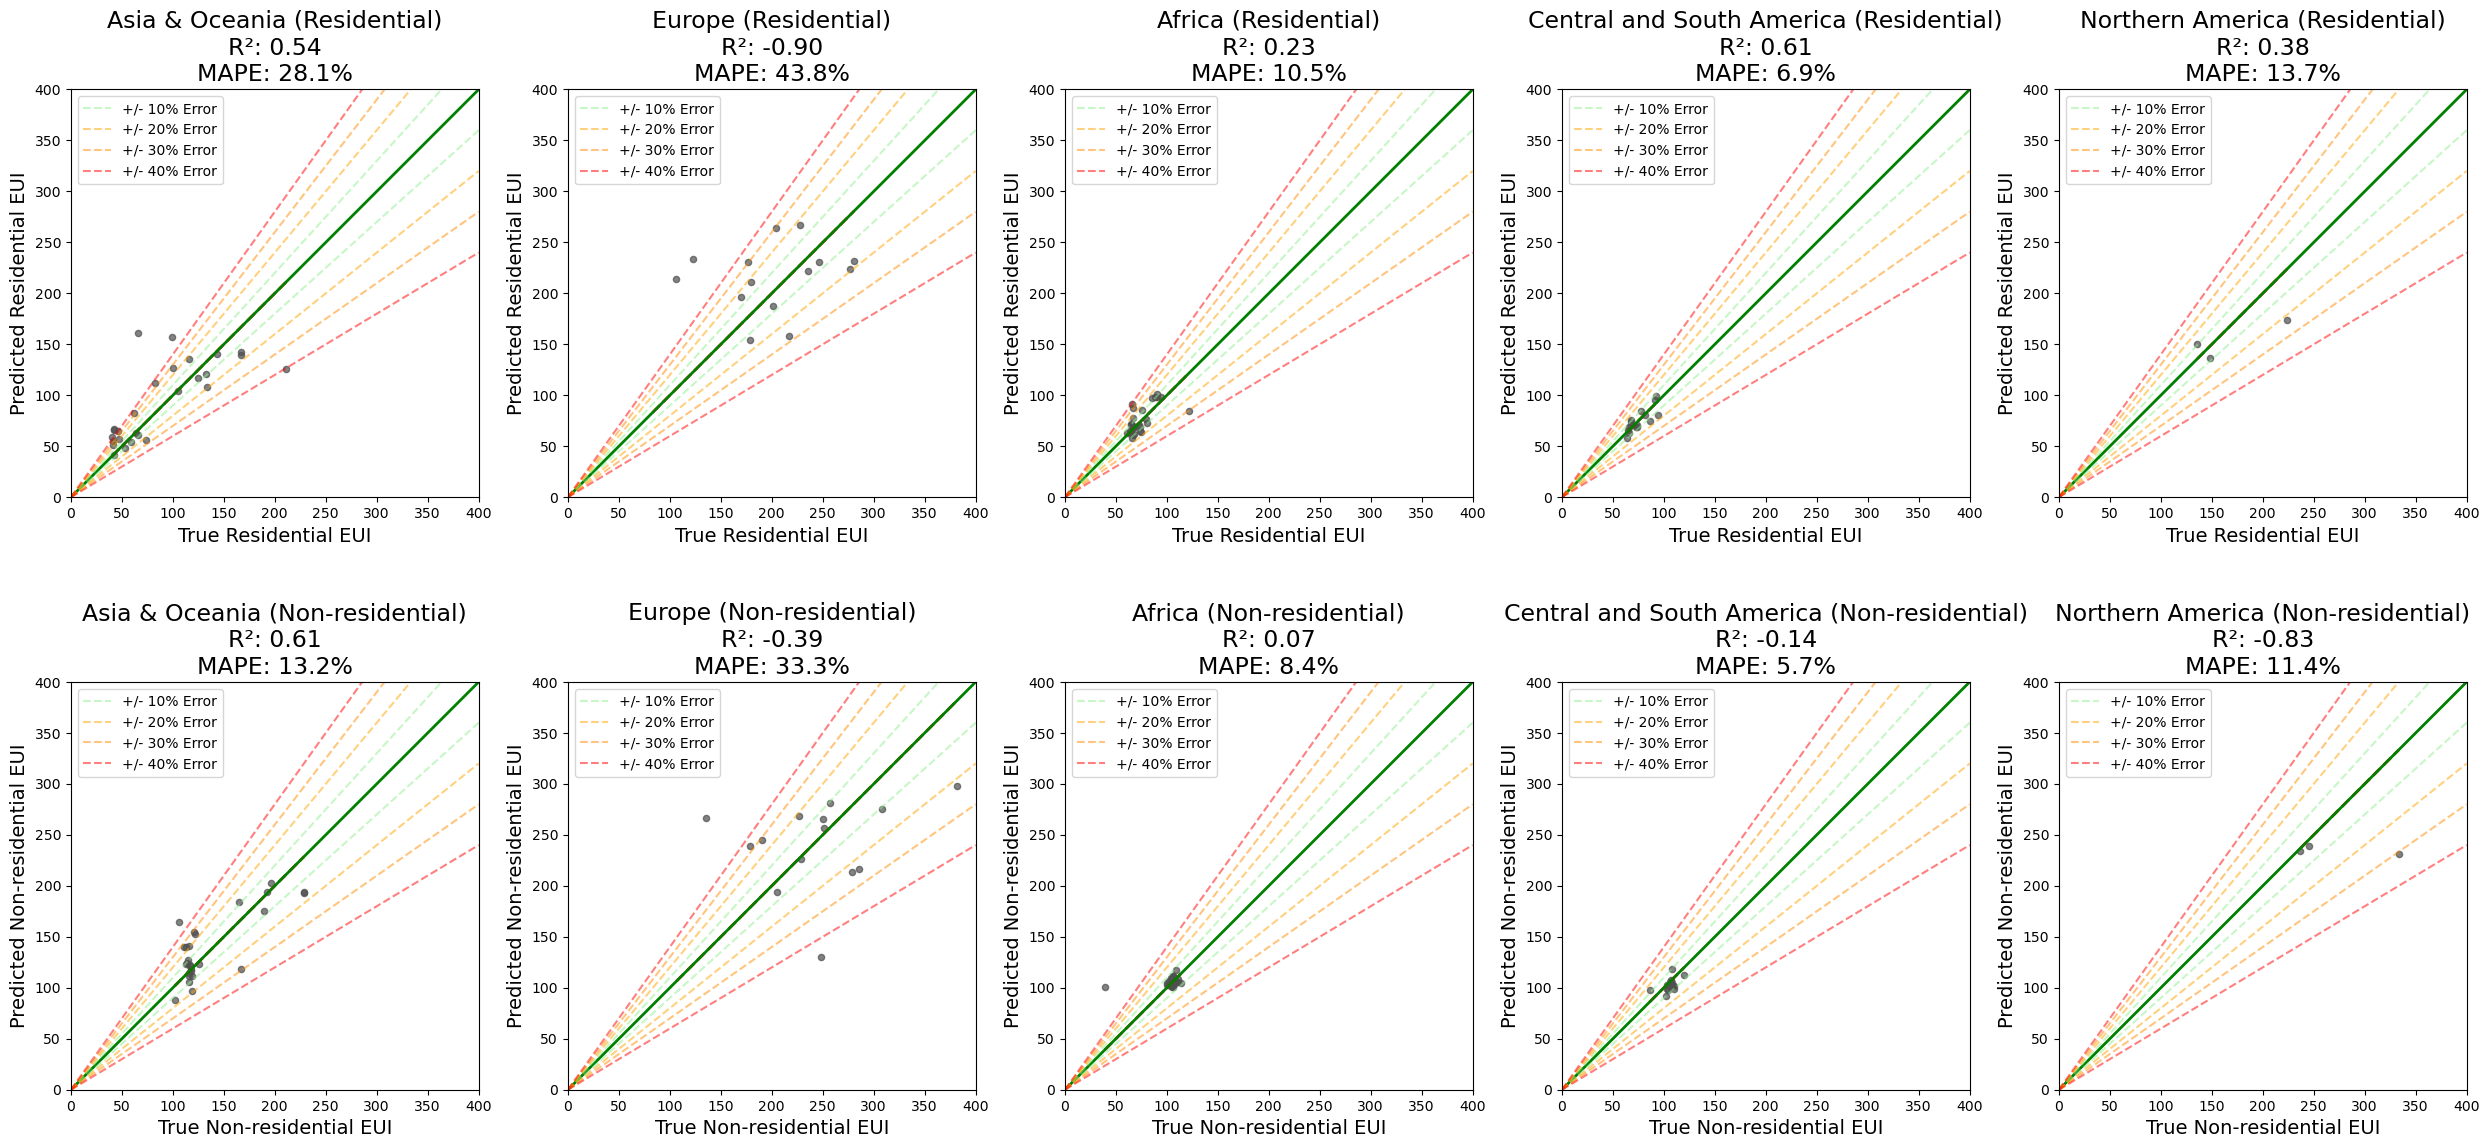

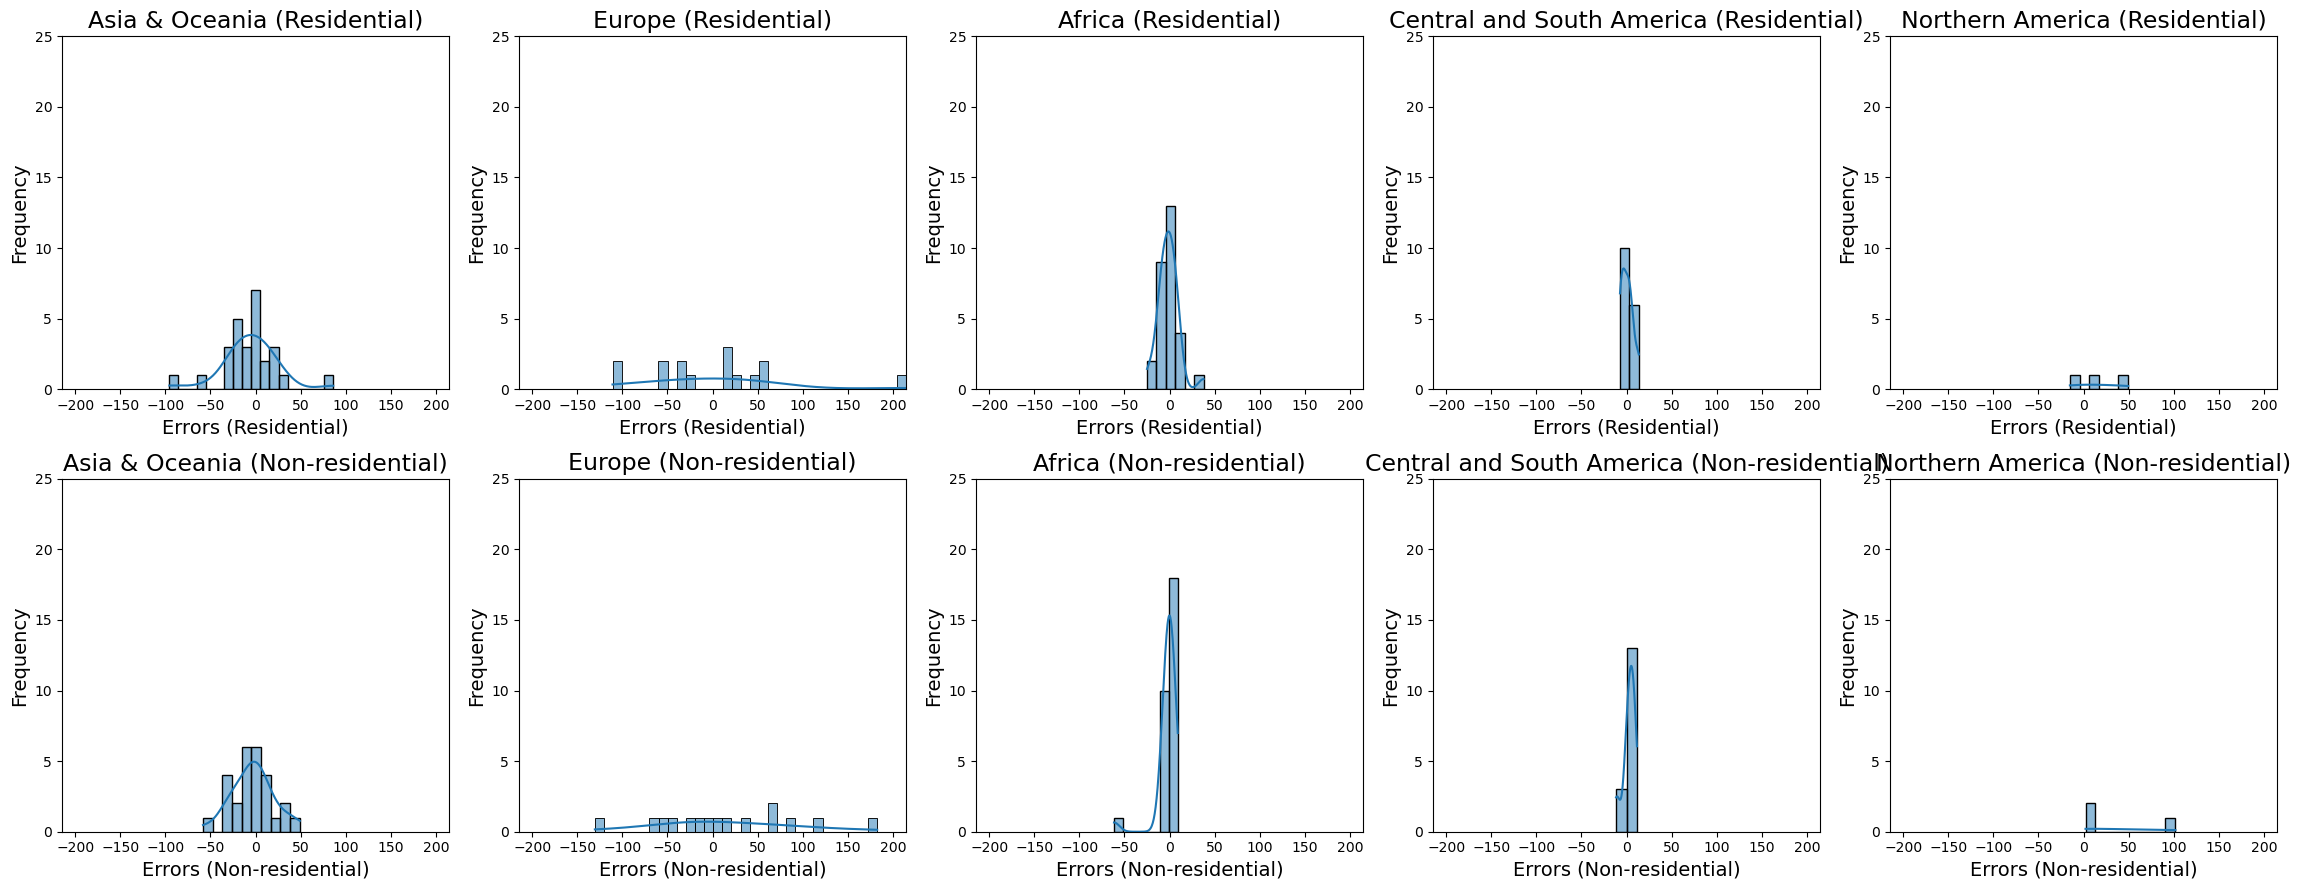

In [13]:
# Within-domain with Ridge
model_ridge_within = Ridge(**ridge_params)
results_ridge_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_ridge_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_ridge_within, 
    save_path='../figures/model_plots/ridge_within_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_within,
    save_path='../figures/model_plots/ridge_within_domain_error_distribution.png')

### Linear Regression - Ridge - Cross Domain

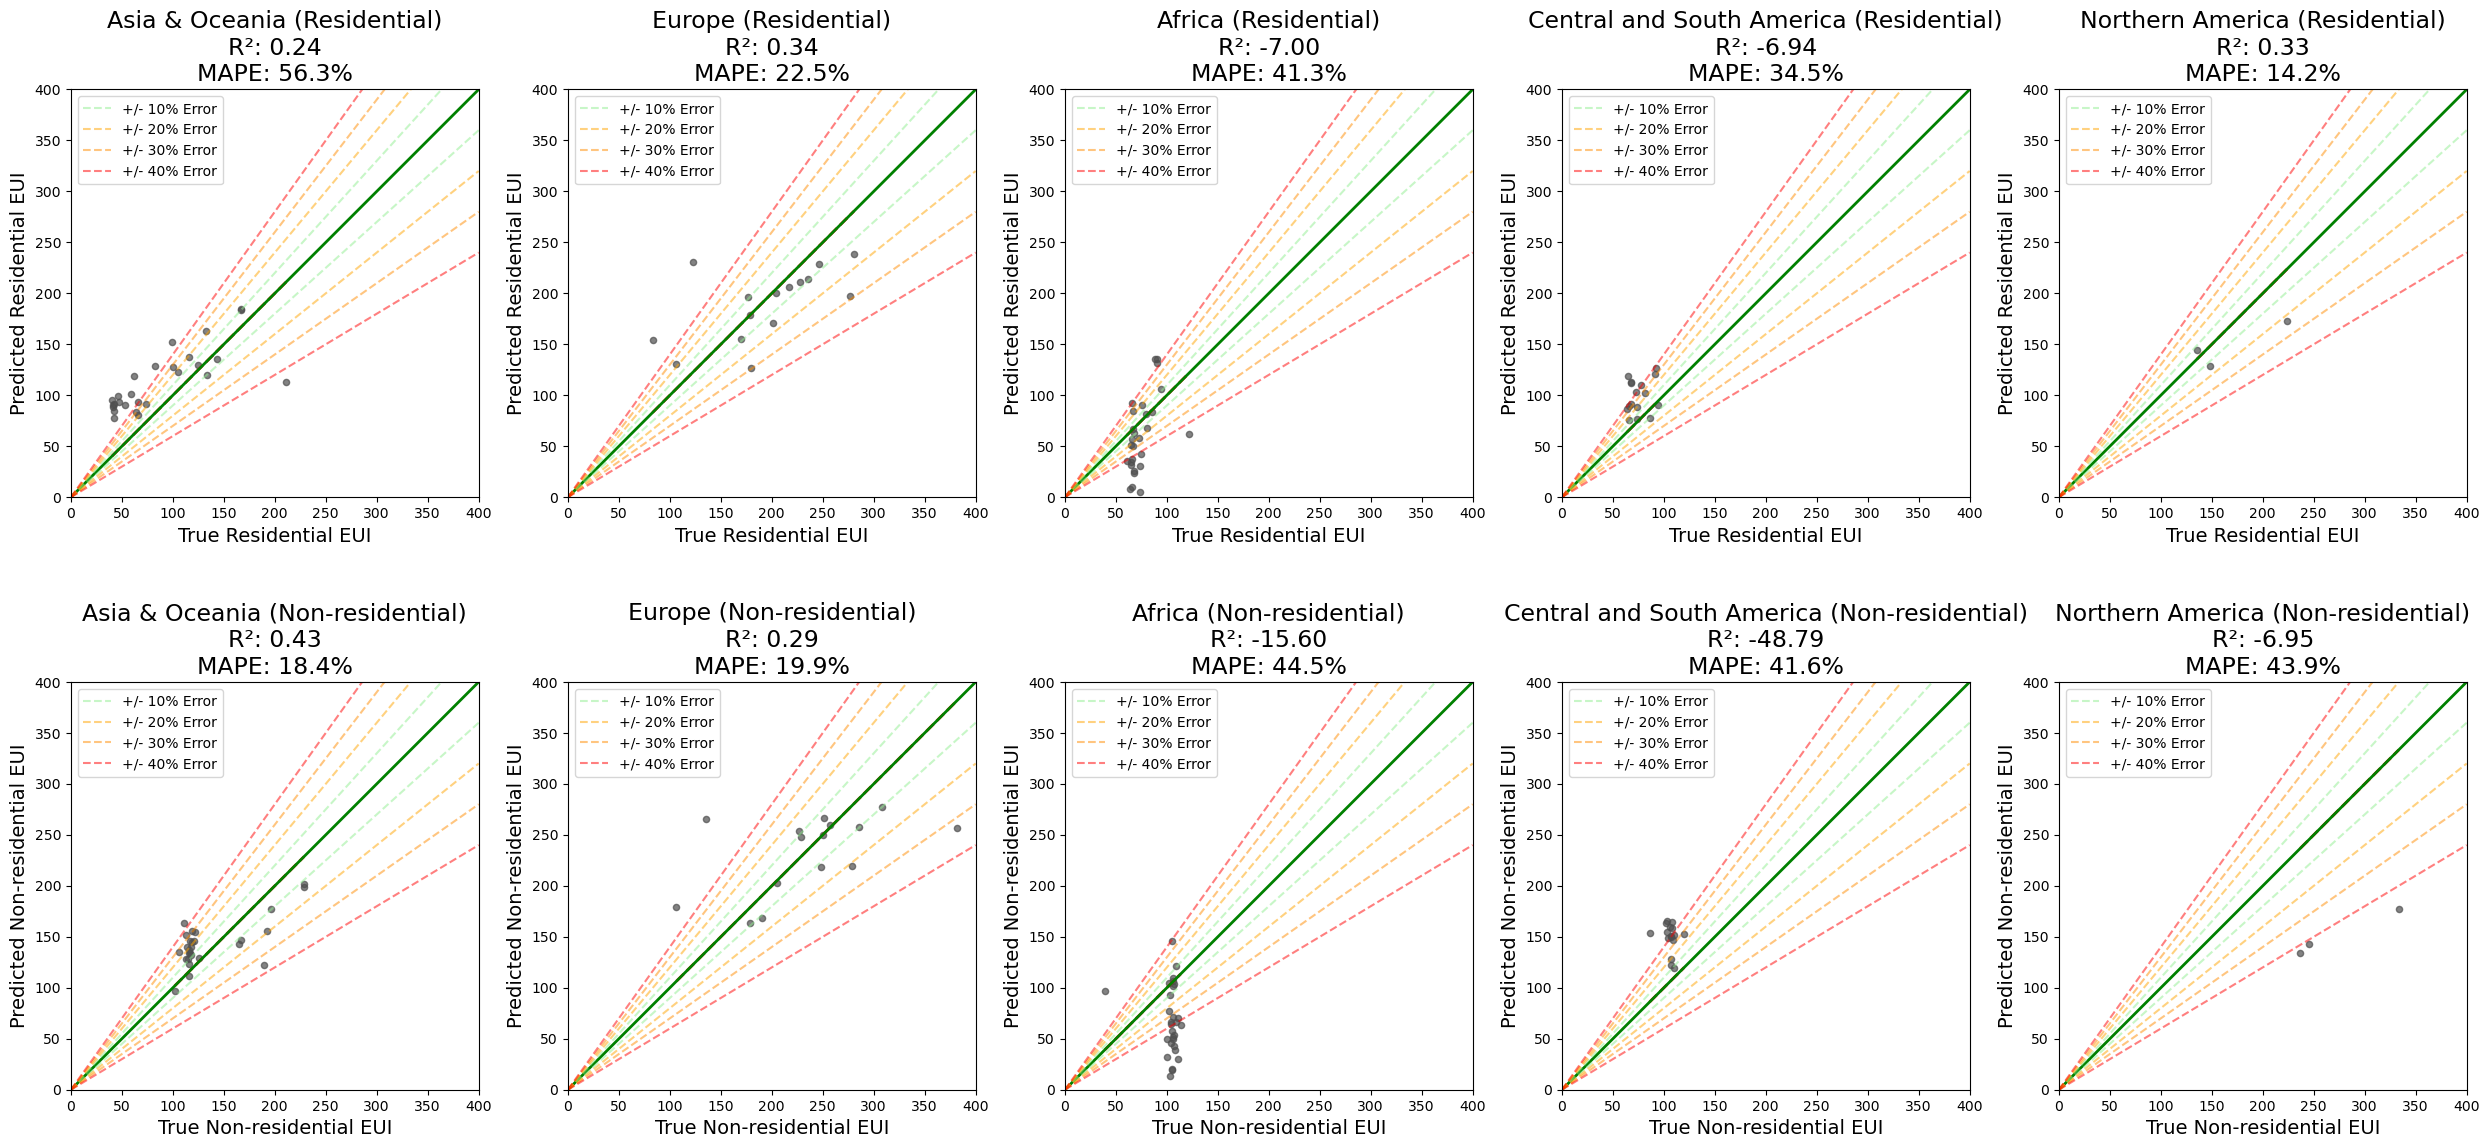

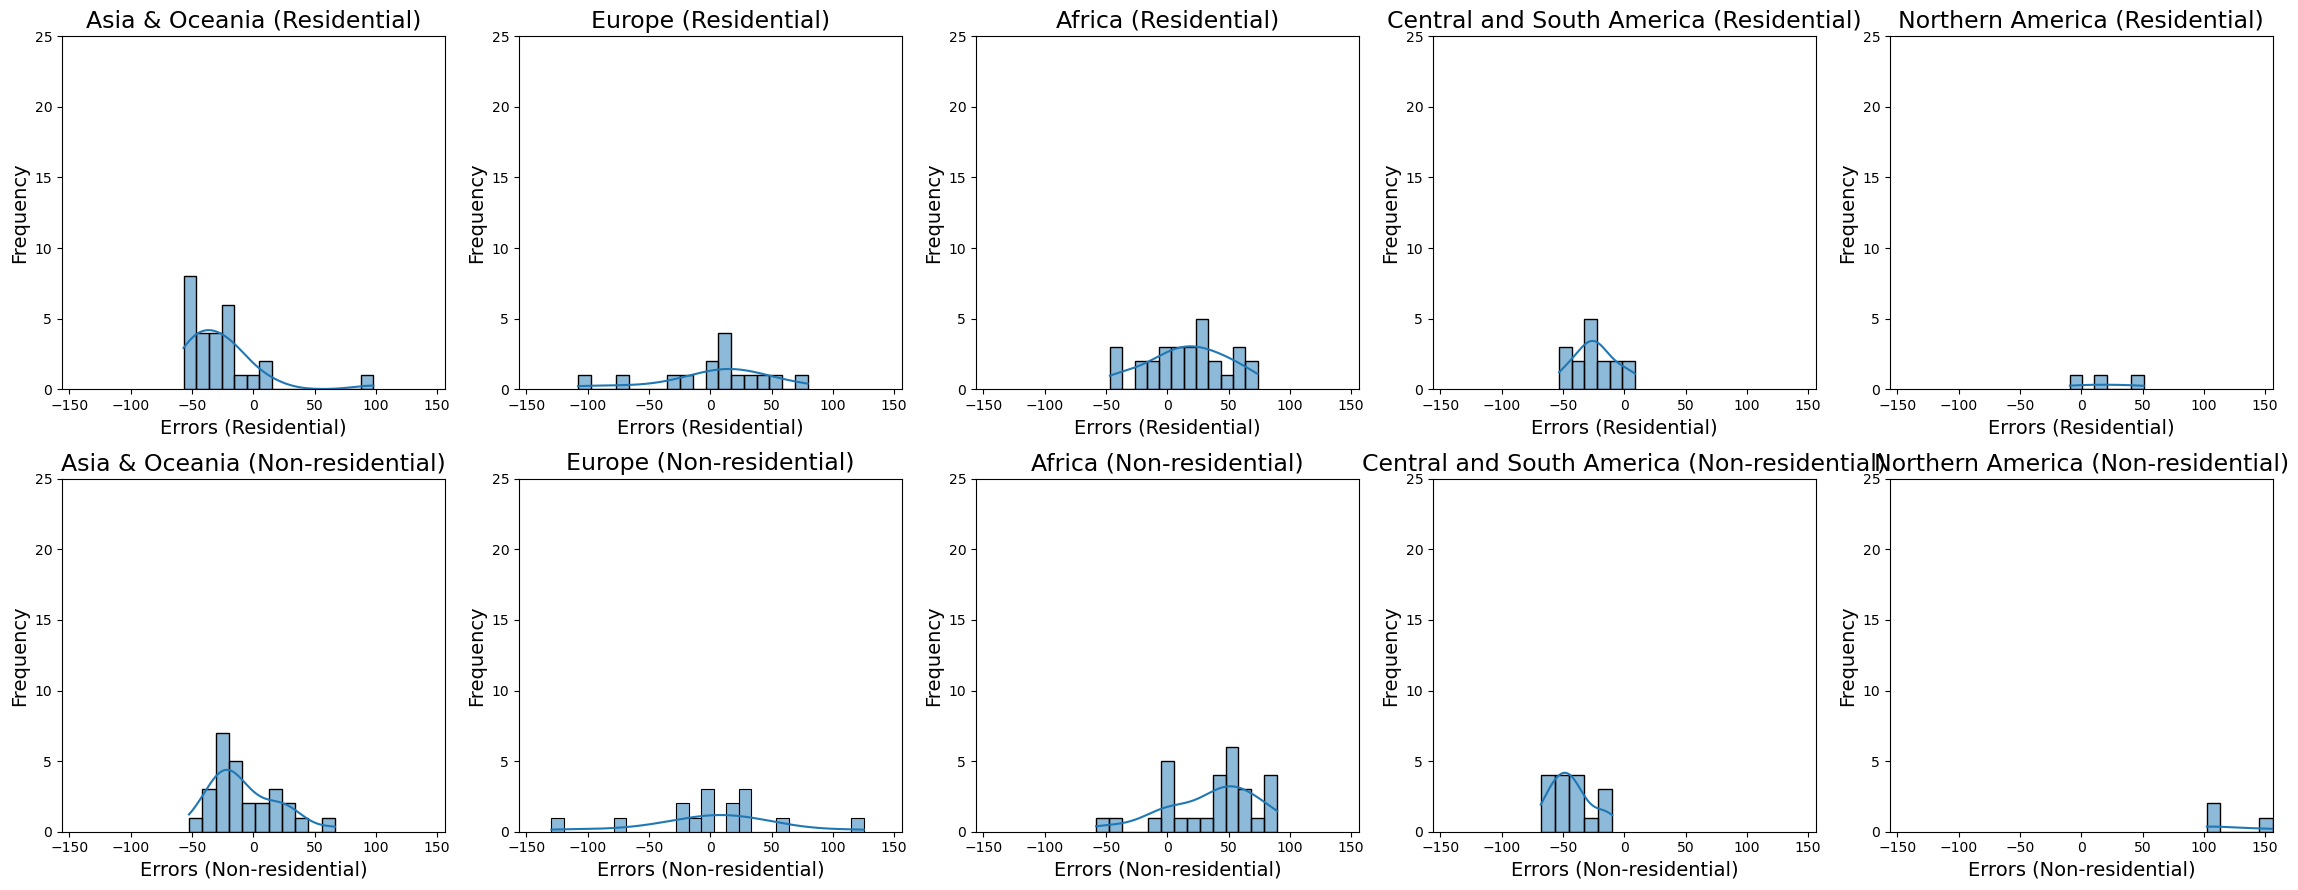

In [14]:
# Cross-domain with Ridge
model_ridge_cross = Ridge(**ridge_params)
results_ridge_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_ridge_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_ridge_cross,
    save_path='../figures/model_plots/ridge_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_cross,
    save_path='../figures/model_plots/ridge_cross_domain_error_distribution.png')


### Linear Regression - Ridge - All Domain

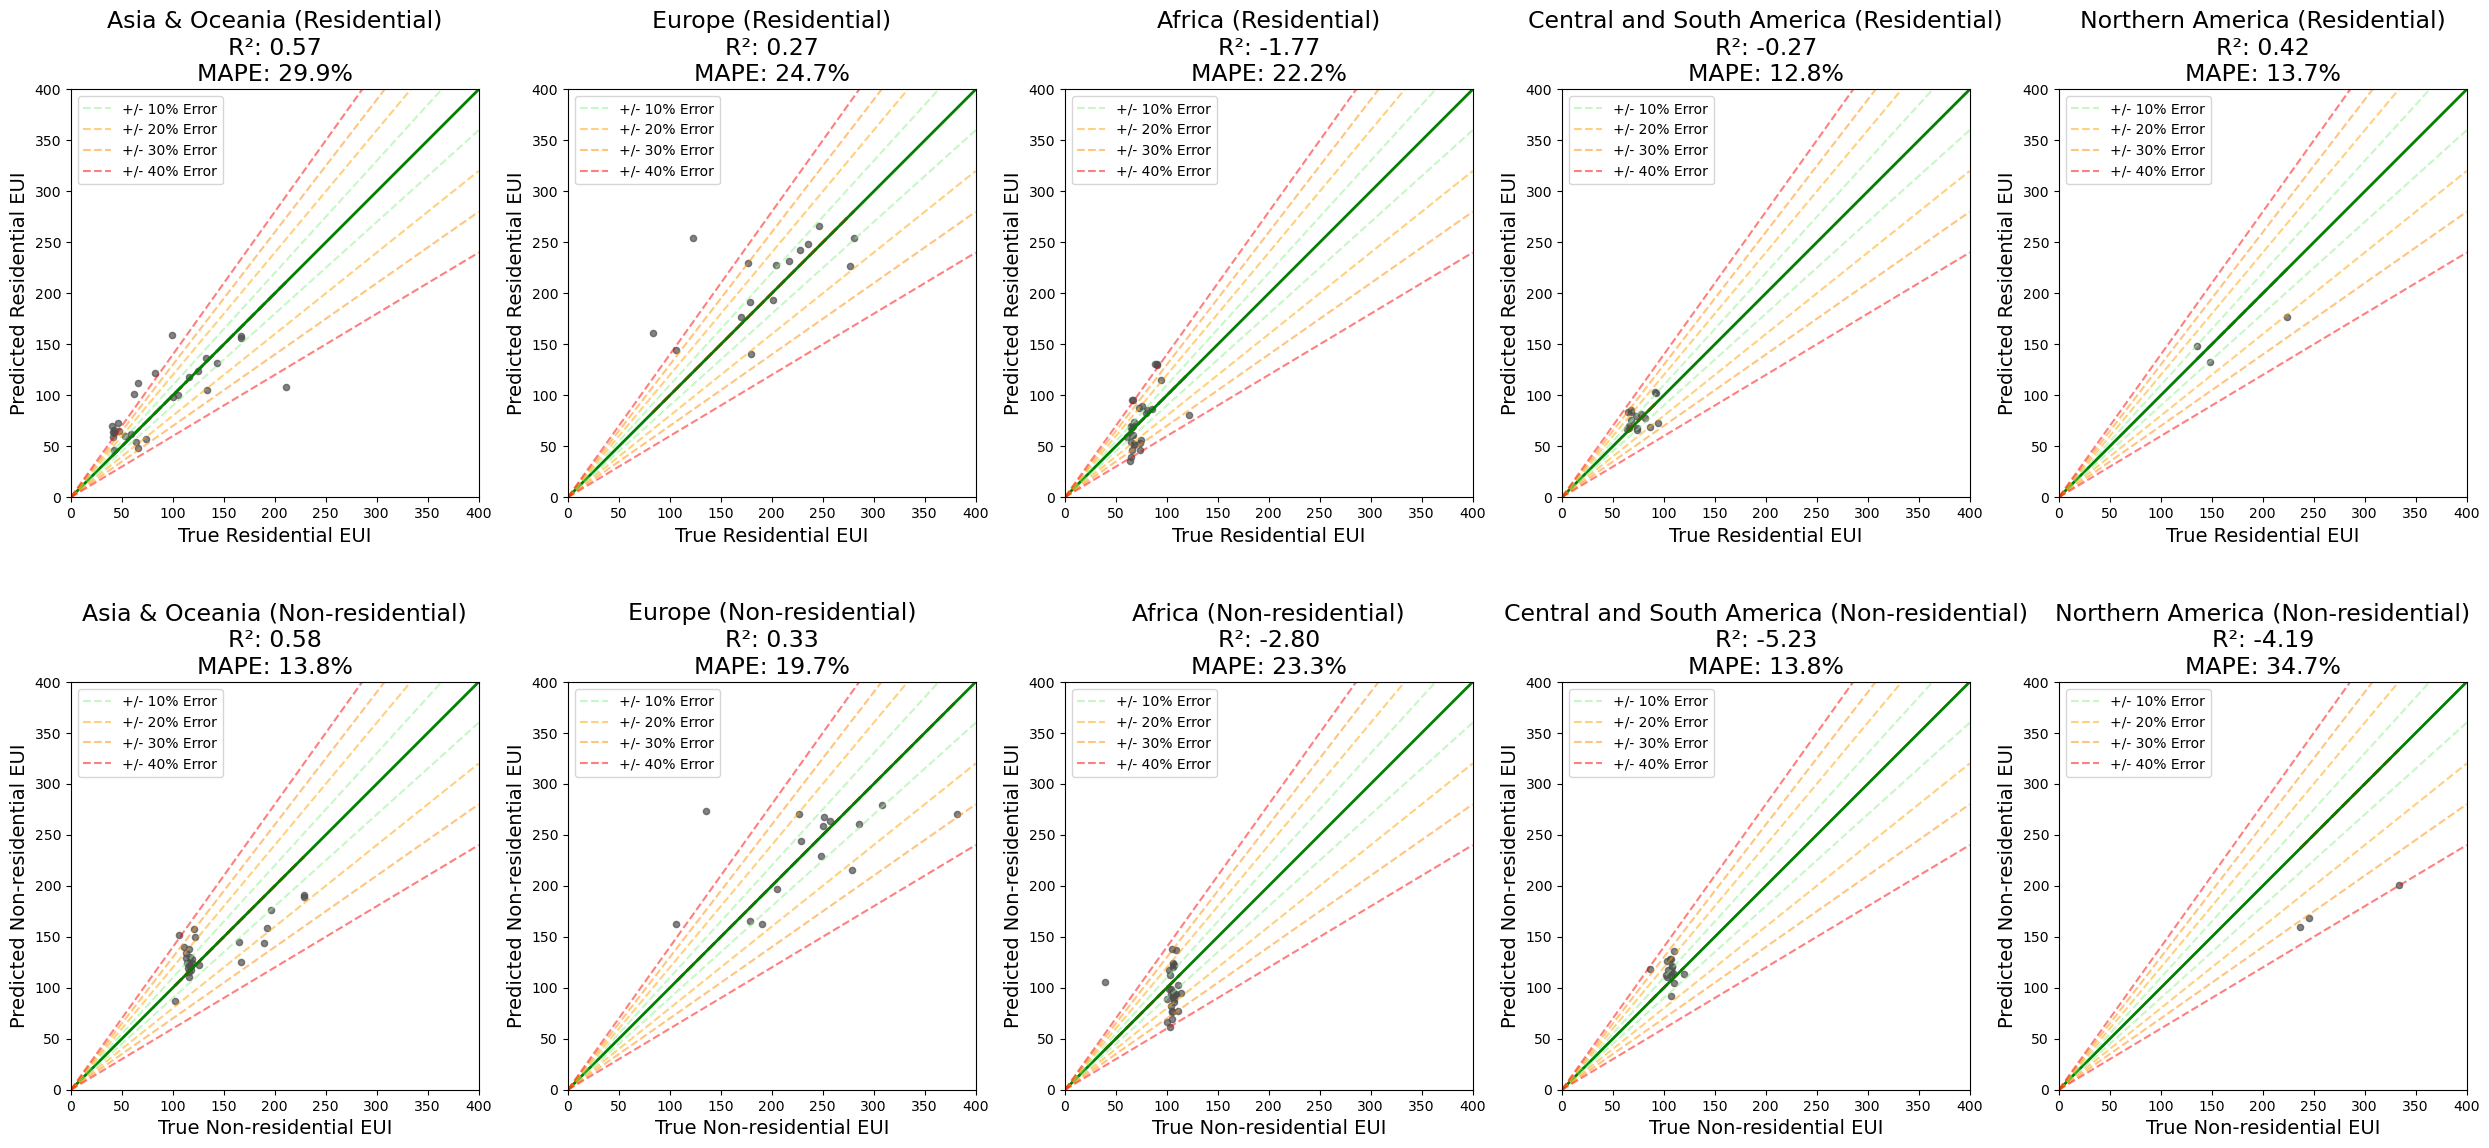

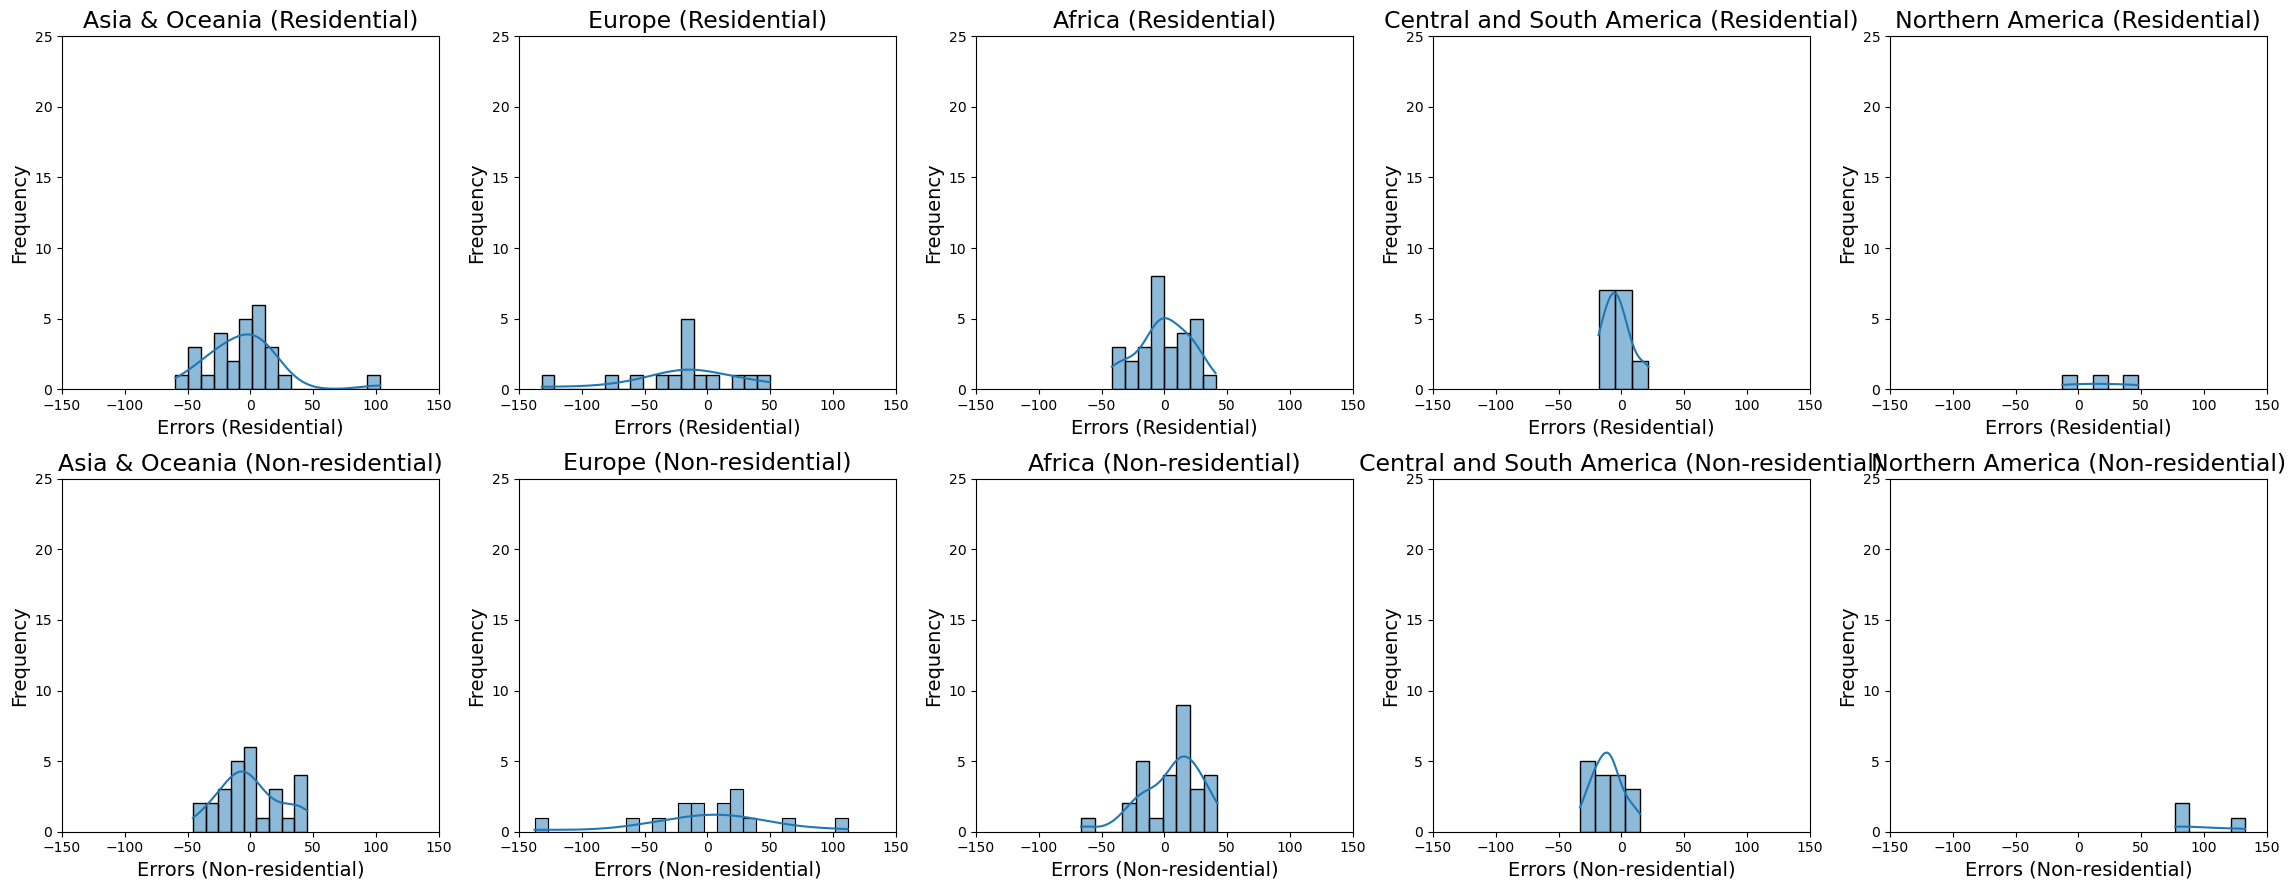

In [15]:
model_ridge_all = Ridge(**ridge_params)
results_ridge_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_ridge_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_ridge_all,
    save_path='../figures/model_plots/ridge_all_domain_eui_predictions.png')

create_error_distribution_plots(results_ridge_all,
    save_path='../figures/model_plots/ridge_all_domain_error_distribution.png')

In [16]:
RidgeModel = lambda: Ridge(**ridge_params)

ridge_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=RidgeModel,
   feature_abbreviations=feature_abbreviations,
   model_details="Ridge, " + ", ".join(f"{k}={v}" for k, v in ridge_params.items())
)
ridge_detailed_results['Model'] = 'LR Ridge'
ridge_average_results = calculate_average_metrics(ridge_detailed_results).reset_index()

ridge_average_results

Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Ridge   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Ridge   
3      Residential EUI (kWh/m2/year)  within_domain  LR Ridge   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Ridge   
5      Residential EUI (kWh/m2/year)     all_domain  LR Ridge   

      Model Details                                      Features Used  \
0  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  Ridge, alpha=1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE      R²       MSE  \
0  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  14.40  -0.136  2050.757   
1  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  33.66 -14.122  4742.433   
2  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  21.06  -2.264  2849.196   
3  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.60   0.171  1617.113   
4  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  33.76  -2.603  1374.141   
5  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.66  -0.156   937.436   

     RMSE     MAE   WAPE  
0  35.801  25.078  12.50  
1  60.750  54.067  32.30  
2  43.684  37.766  19.86  
3  31.457  23.772  17.60  
4  36.596  30.254  29.46  
5  28.186  21.759  18.66

In [17]:
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

ridge_detailed_results.to_csv(f'../results/{timestamp}_ridge_detailed_results.csv')
ridge_average_results.to_csv(f'../results/{timestamp}_ridge_average_results.csv')


# Linear Regression - Lasso regularization

In [18]:
lasso_params = {
    'alpha': 1.0,          # regularization strength
  #  'fit_intercept': True, # include bias term
  #  'max_iter': 1000,      # maximum iterations
  #  'tol': 1e-4,          # tolerance for optimization
  #  'selection': 'cyclic', # feature selection method
  #  'random_state': 42     # for reproducibility
}

### Linear Regression - Lasso - Within Domain

/Users/barbaraflores/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+01, tolerance: 9.922e-01
  model = cd_fast.enet_coordinate_descent(


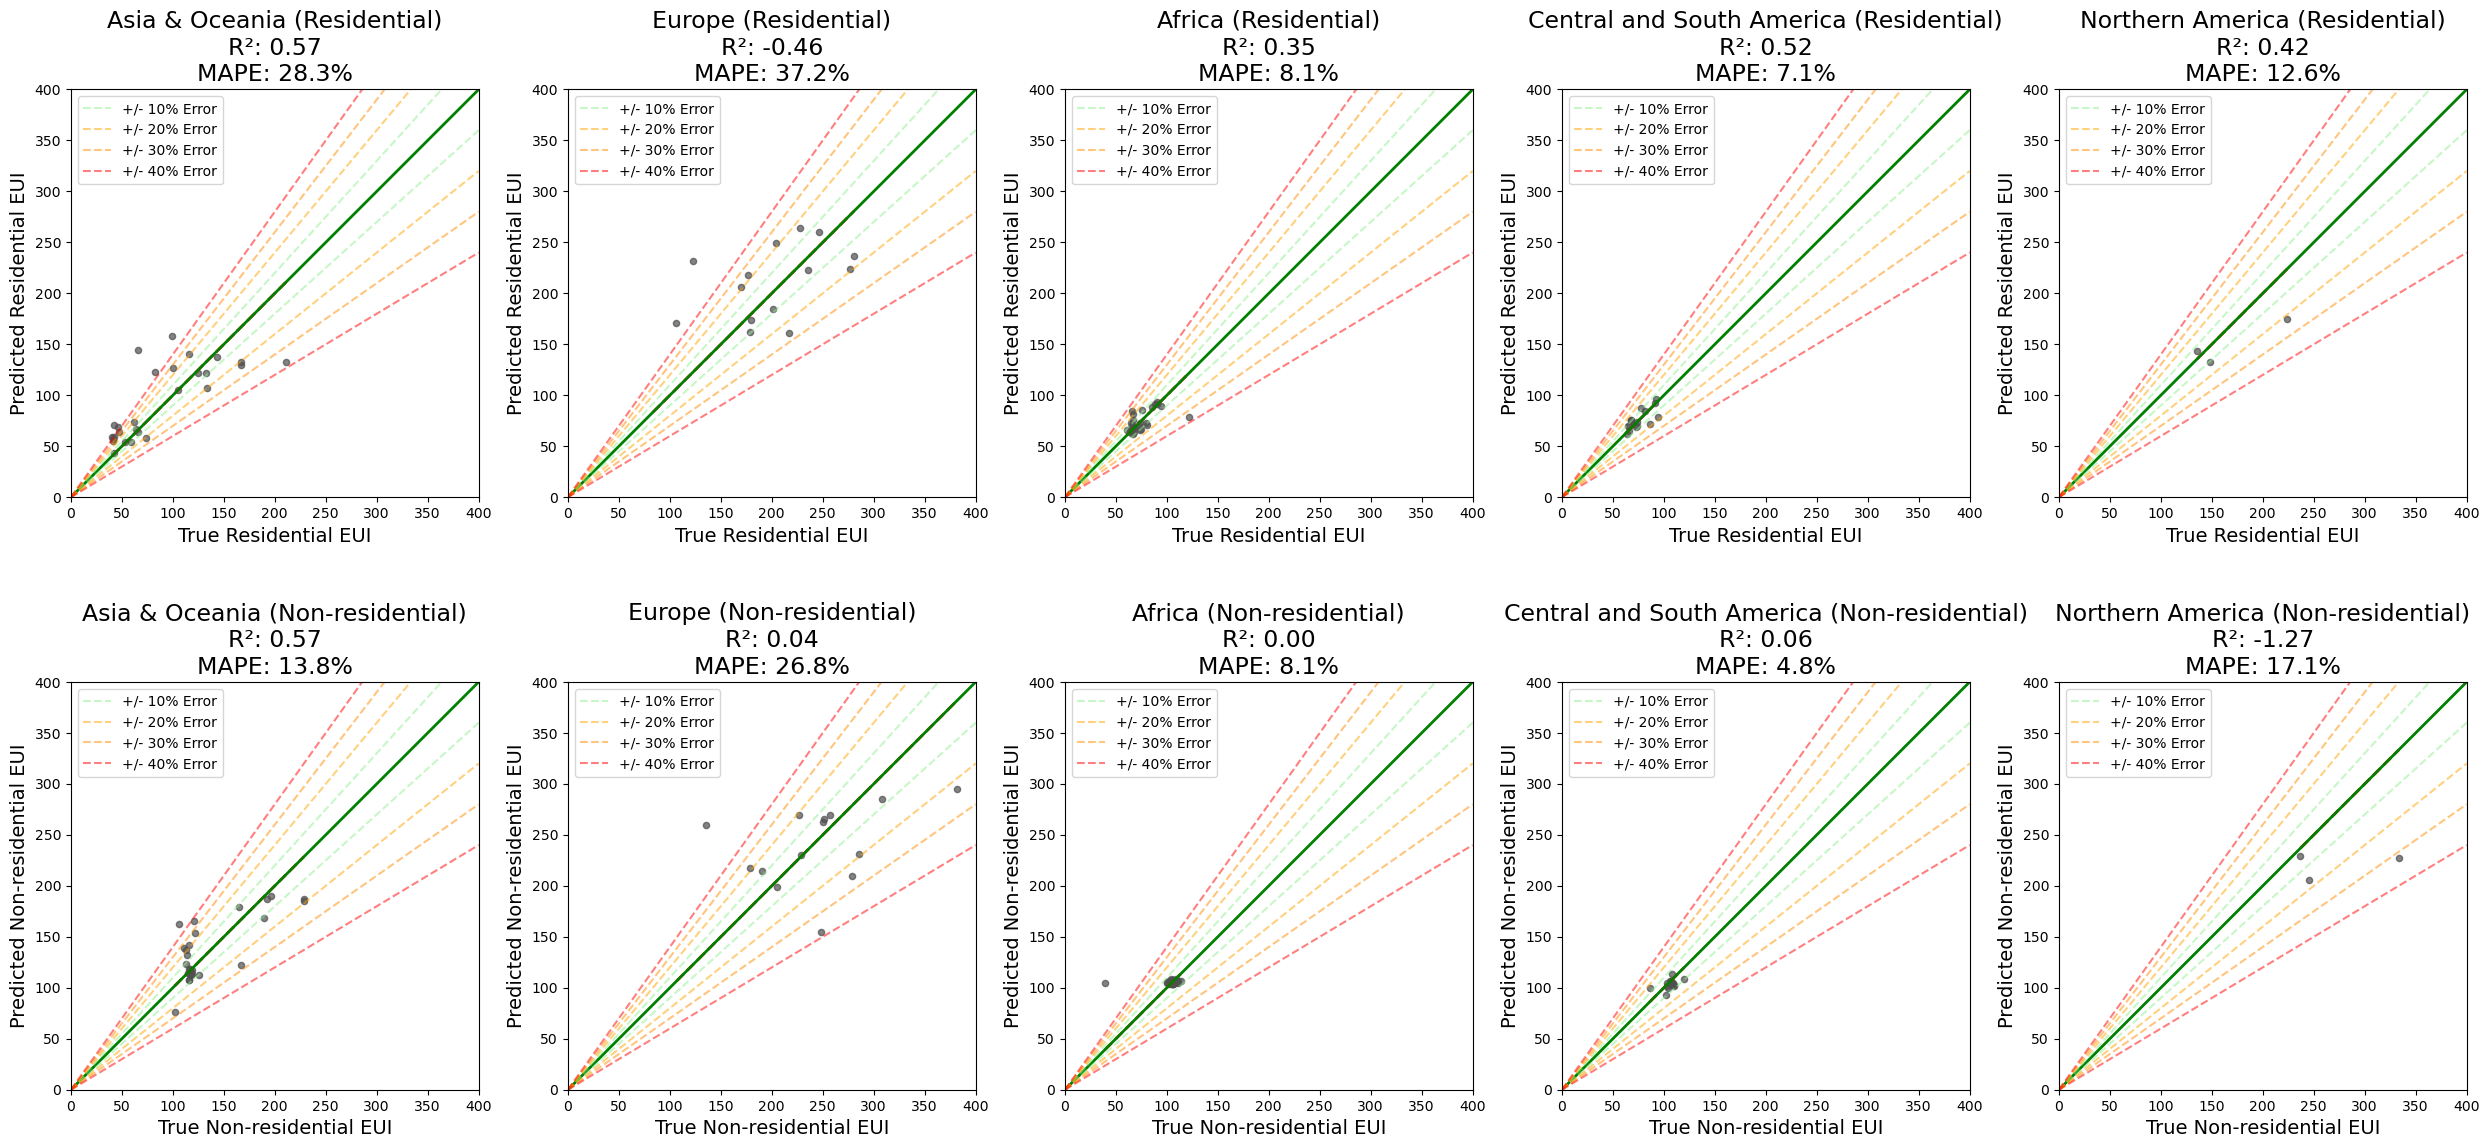

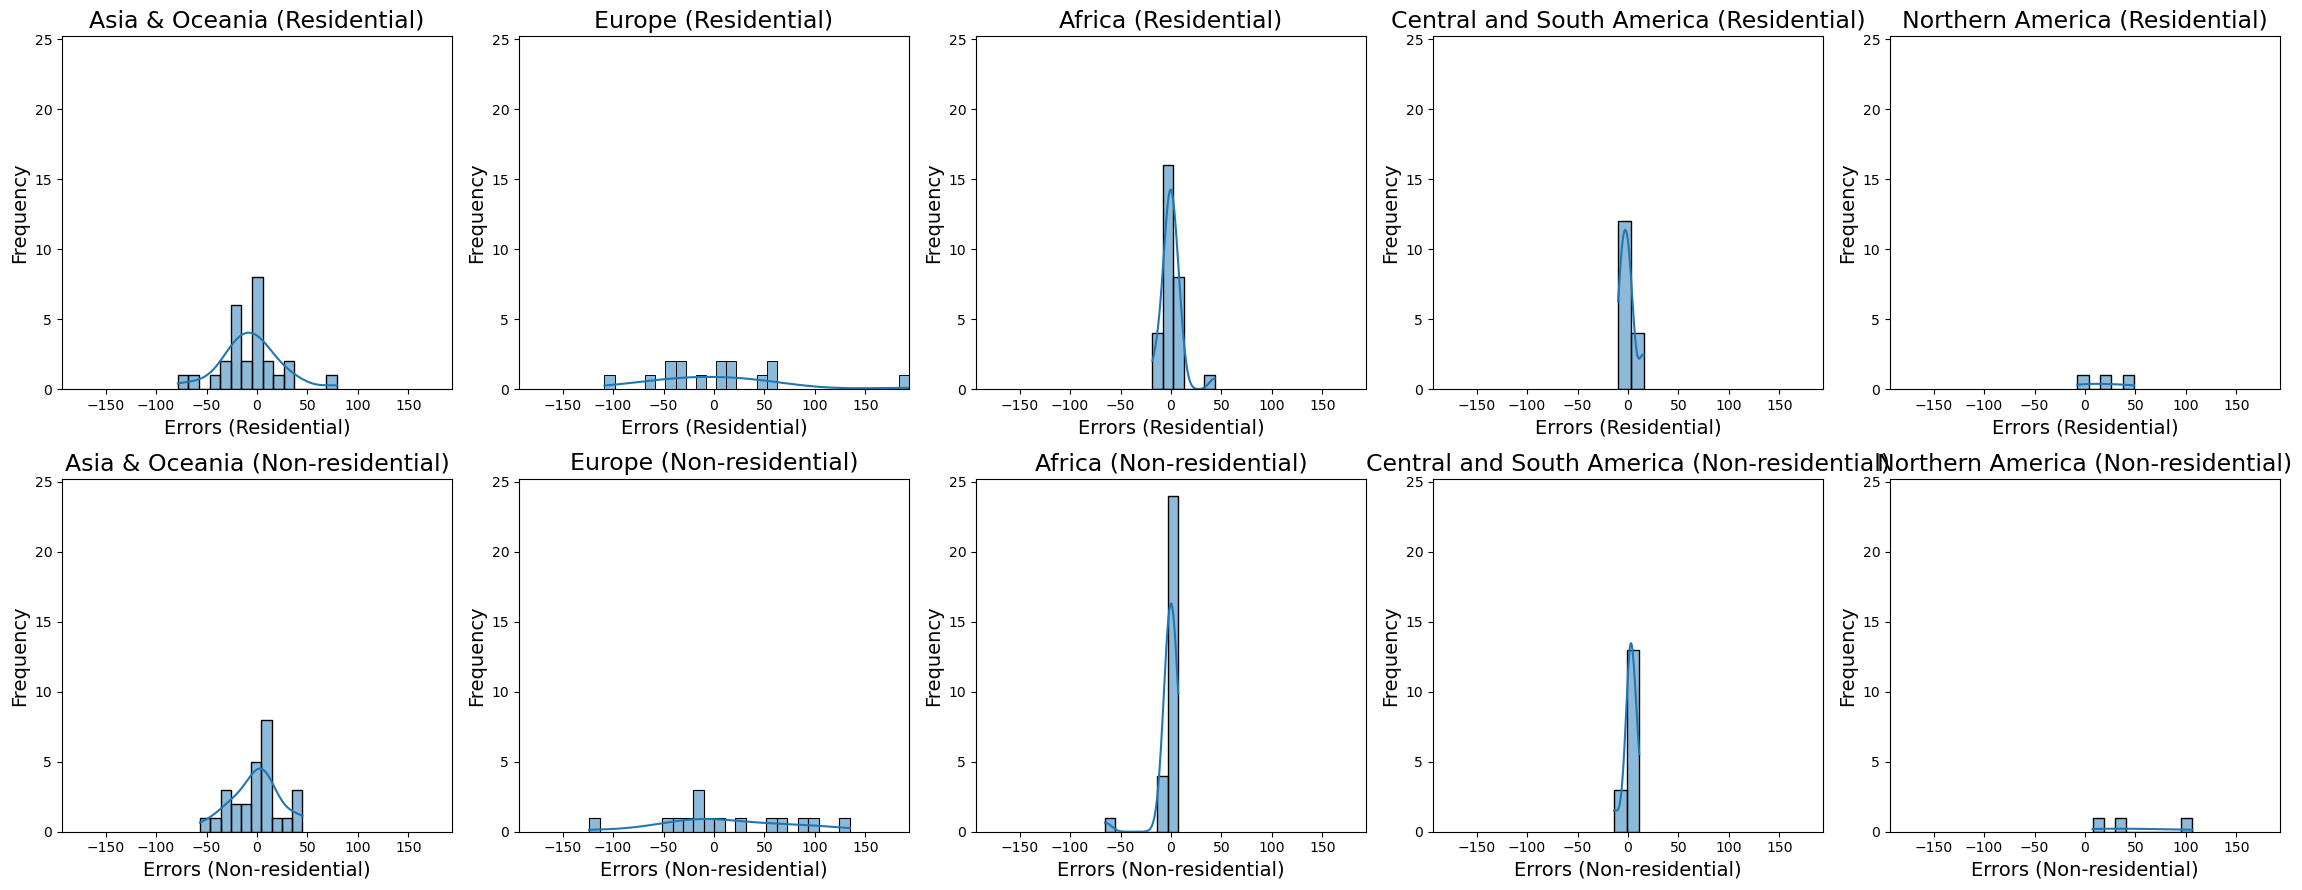

In [19]:
# Within-domain with Lasso
model_lasso_within = Lasso(**lasso_params)
results_lasso_within = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions, 
    features=features,
    model=model_lasso_within,
    strategy='within_domain'
)

create_eui_comparison_plots(results_lasso_within, 
    save_path='../figures/model_plots/lasso_within_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_within,
    save_path='../figures/model_plots/lasso_within_domain_error_distribution.png')


### Linear Regression - Lasso - Cross Domain

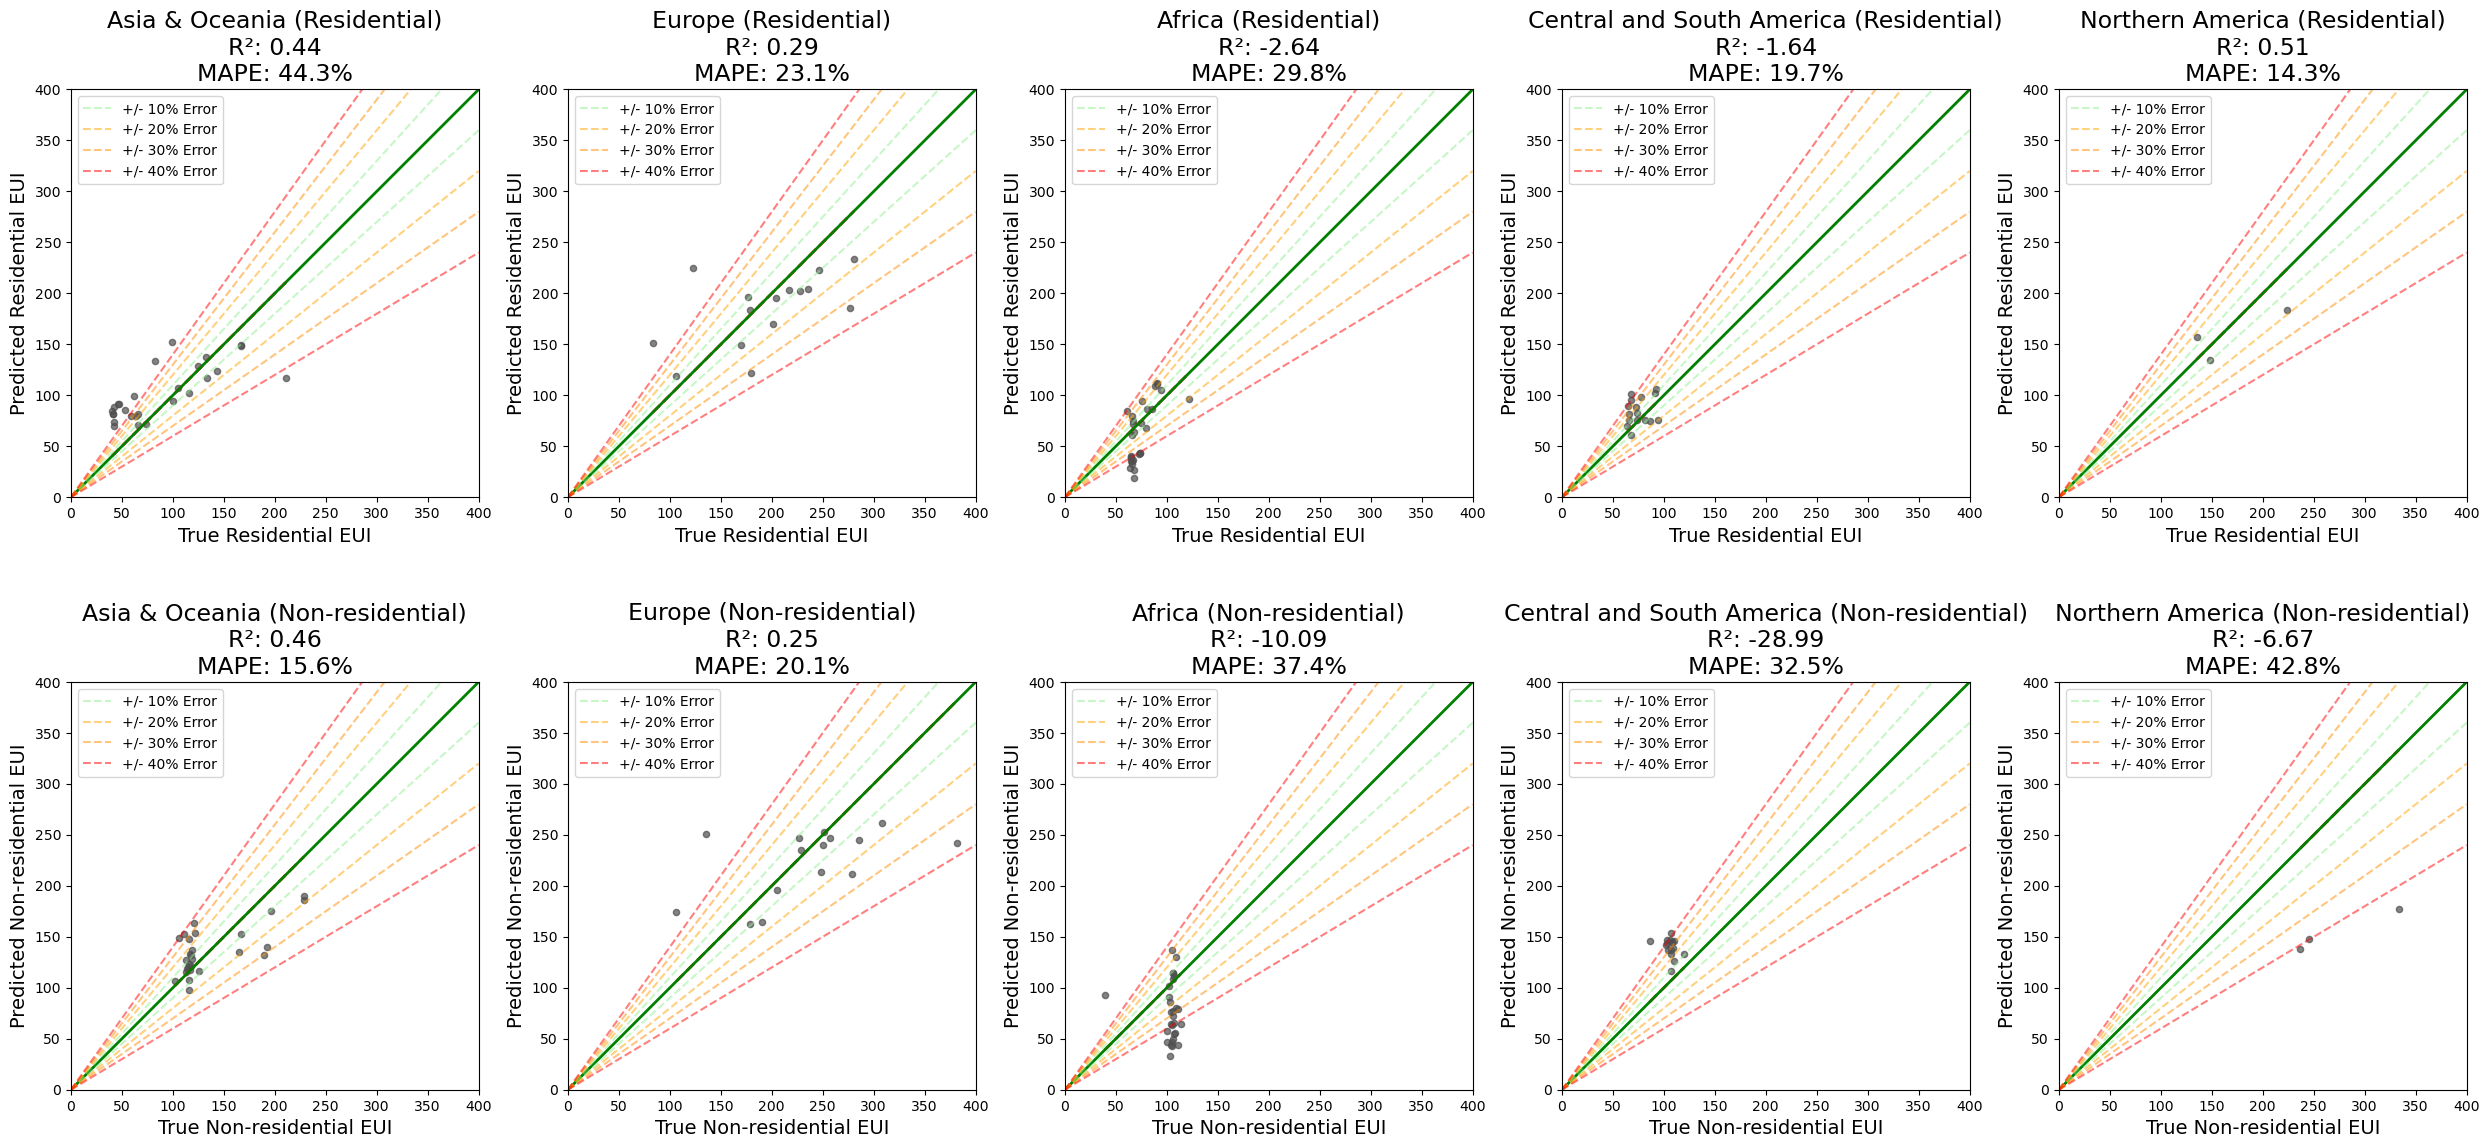

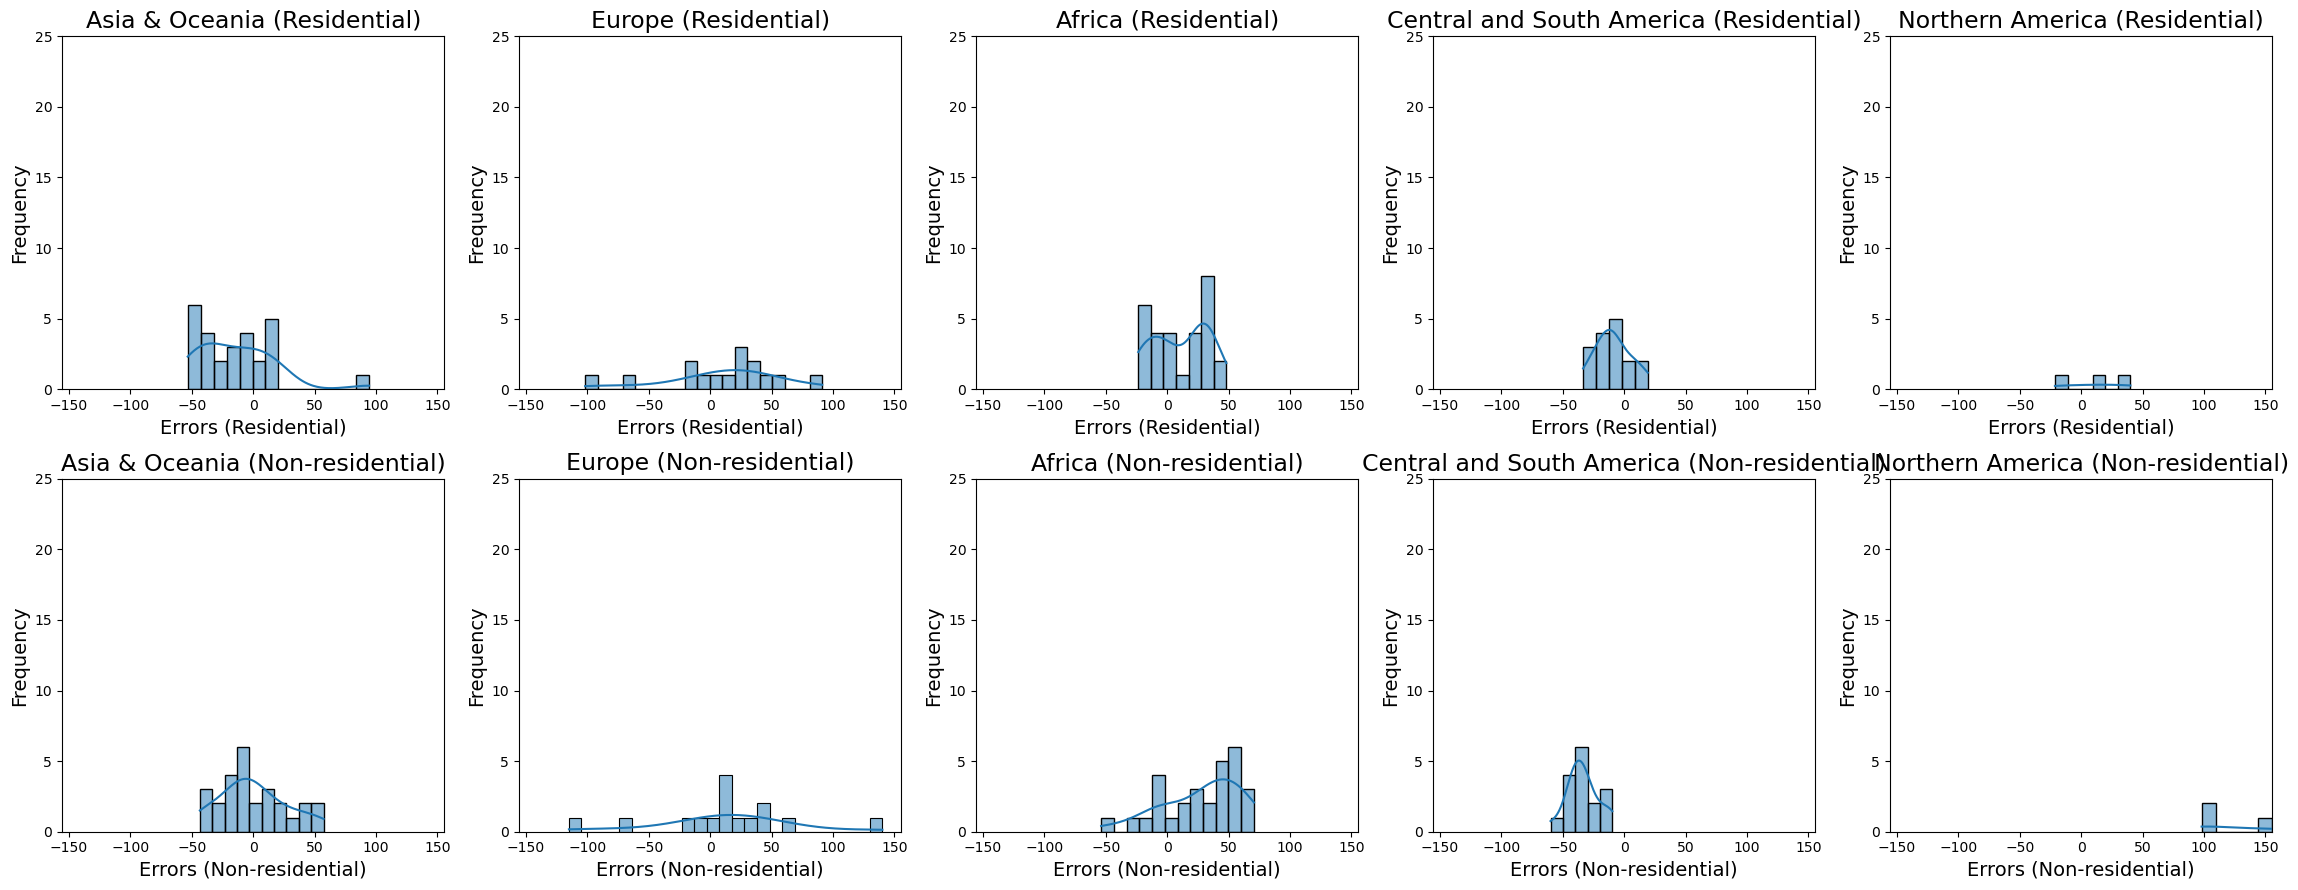

In [20]:
# Cross-domain with Lasso
model_lasso_cross = Lasso(**lasso_params)
results_lasso_cross = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features, 
    model=model_lasso_cross,
    strategy='cross_domain'
)

create_eui_comparison_plots(results_lasso_cross,
    save_path='../figures/model_plots/lasso_cross_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_cross,
    save_path='../figures/model_plots/lasso_cross_domain_error_distribution.png')


### Linear Regression - Lasso - All Domain

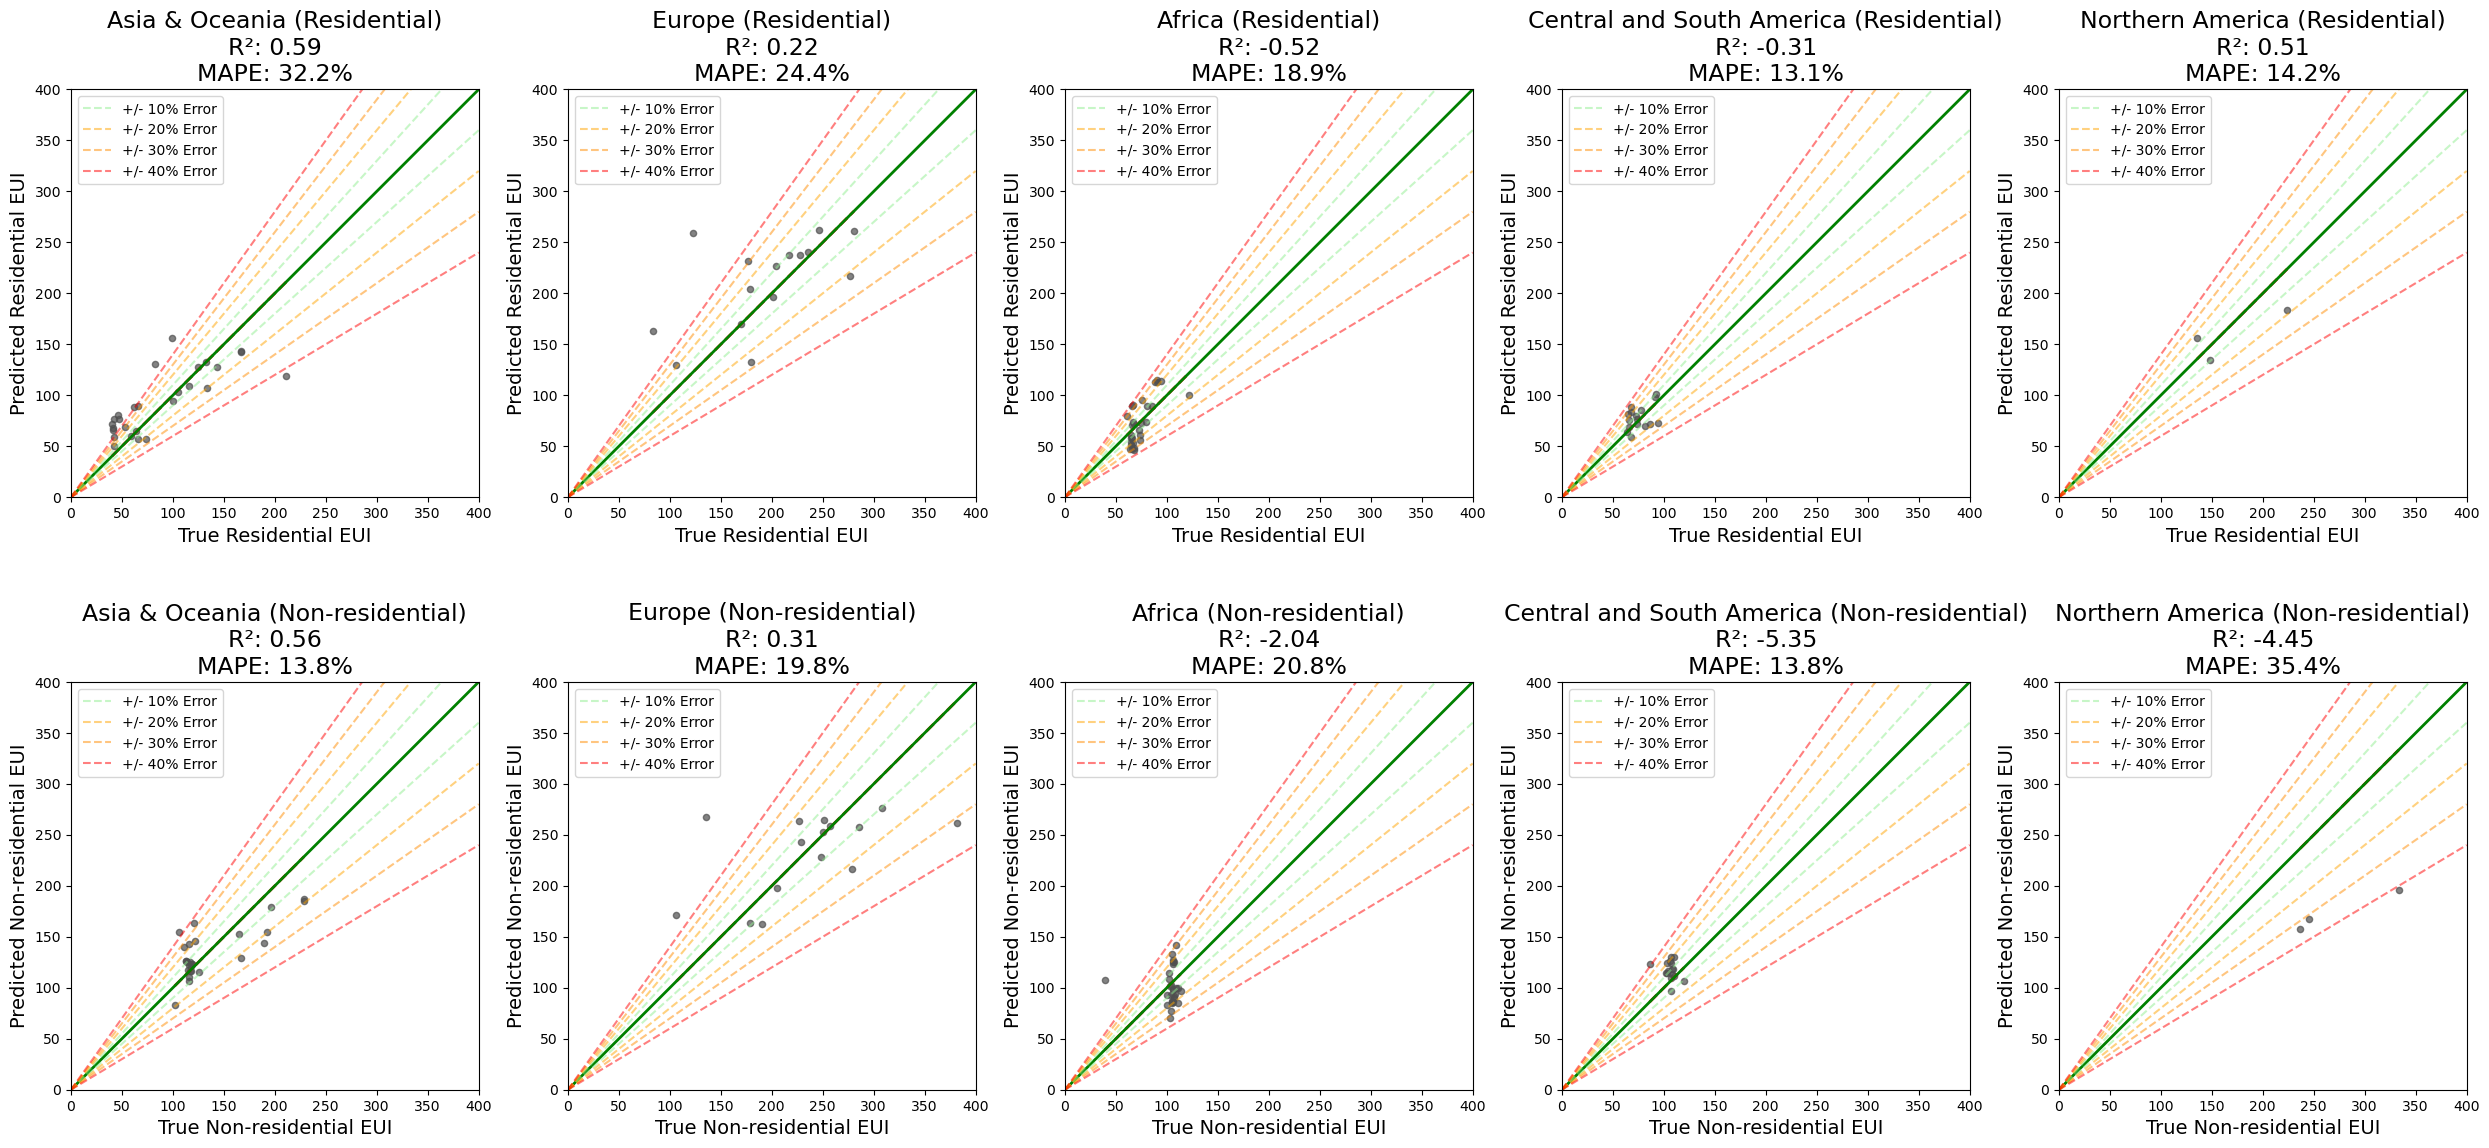

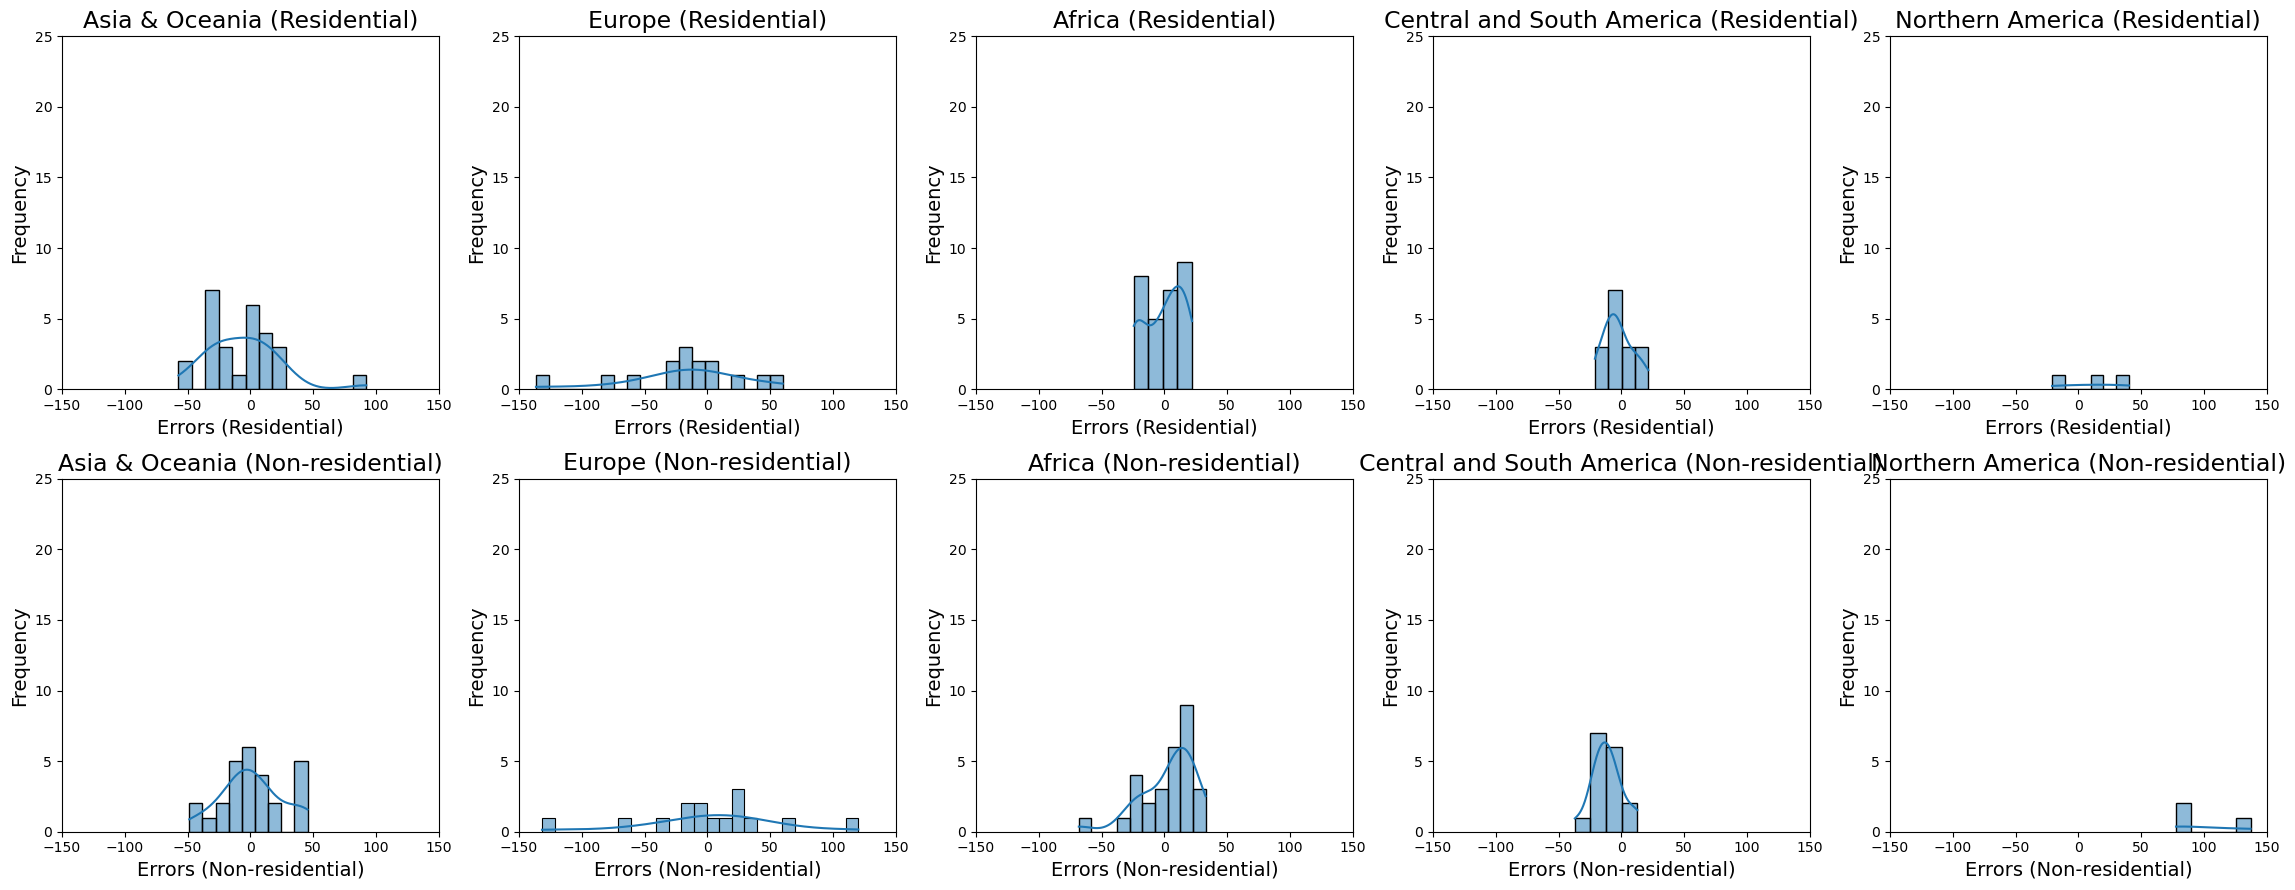

In [21]:
# All-domain with Lasso
model_lasso_all = Lasso(**lasso_params)
results_lasso_all = train_and_evaluate_models(
    merged_df=merged_df,
    regions=regions,
    features=features,
    model=model_lasso_all, 
    strategy='all_domain'
)

create_eui_comparison_plots(results_lasso_all,
    save_path='../figures/model_plots/lasso_all_domain_eui_predictions.png')

create_error_distribution_plots(results_lasso_all,
    save_path='../figures/model_plots/lasso_all_domain_error_distribution.png')

In [22]:
LassoModel = lambda: Lasso(**lasso_params)

lasso_detailed_results = evaluate_model_strategies(
   merged_df=merged_df,
   regions=regions,
   features=features,
   model_type=LassoModel,  
   feature_abbreviations=feature_abbreviations,
   model_details="Lasso, " + ", ".join(f"{k} = {v}" for k, v in lasso_params.items())
)

lasso_detailed_results['Model'] = 'LR Lasso'
lasso_average_results = calculate_average_metrics(lasso_detailed_results).reset_index()
lasso_average_results

/Users/barbaraflores/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+01, tolerance: 9.922e-01
  model = cd_fast.enet_coordinate_descent(


Target       Strategy     Model  \
0  Non-residential EUI (kWh/m2/year)  within_domain  LR Lasso   
1  Non-residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
2  Non-residential EUI (kWh/m2/year)     all_domain  LR Lasso   
3      Residential EUI (kWh/m2/year)  within_domain  LR Lasso   
4      Residential EUI (kWh/m2/year)   cross_domain  LR Lasso   
5      Residential EUI (kWh/m2/year)     all_domain  LR Lasso   

        Model Details                                      Features Used  \
0  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
1  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
2  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
3  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
4  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   
5  Lasso, alpha = 1.0  hdd_total_year, cdd_total_year, GDP_per_capita...   

                                Features Abbreviated   MAPE     R²       MSE  \
0  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  14.12 -0.120  1857.877   
1  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  29.68 -9.007  4323.359   
2  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.72 -2.194  2943.997   
3  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  18.66  0.279  1310.994   
4  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  26.24 -0.607  1011.432   
5  HDD | CDD | GDP | URB | Lat | Long | Paris | H...  20.56  0.095   898.327   

     RMSE     MAE   WAPE  
0  34.738  25.724  12.48  
1  56.583  50.102  28.72  
2  43.932  37.610  19.48  
3  29.097  21.509  16.20  
4  30.082  25.158  22.68  
5  26.893  21.294  18.10

In [23]:
lasso_detailed_results.to_csv(f'../results/{timestamp}_lasso_detailed_results.csv')
lasso_average_results.to_csv(f'../results/{timestamp}_lasso_average_results.csv')